# NoteBook / Data Analyses pour Marc :

# Marc :
## Année 2017
#### 1/ Proportion de personnes en état de sous-nutrition?
####       => Calcul sur base Disponibilité Alimentaire Mondiale (données ancien data analyst)
####       => Calcul sur nouveau jeu de donnée mis à jour (Mondial/normalisé/avec toutes les données)
#### 2/ Nombre théorique de personnes qui pourraient être nourries?
####       => Calcul sur base Disponibilité Alimentaire Mondiale (données ancien data analyst + moyenne actualisée 2017 monde)
#### 3/ Nombre théorique de personnes qui pourraient être nourries?
####       => Calcul sur base Disponibilité Alimentaire Produit Végétaux
#### Utilisation de la disponibilité intérieure, part attribuée à l'alimentation animale, perdue et nourriture humaine
#### 
#### + toutes idées additionnelle bonnes à prendre
#### => Téléchargement du jeu de donées FAO complet normalisé
#### => Analyses Big Picture niveau mondial
#### => Calculs des modalitées demandées par ligne de code directes et par solution visuelle graphique
#### => Analyses divergentes sur sujet : Document CERES 2030 et sur la commission de consolidation de la paix de l'ONU du 10 Février 2022

# ---------------------------------

# Objectifs :
## Mélanie :
## Étude un peu plus fine pour chacun des pays
### Année 2017
### Pays avec proportions de personnes sous-alimentées les plus fortes en 2017
### Pays qui ont le plus bénéficié d'aide depuis 2013
### Pays ayant le moins de disponibilité/habitant
### Nombre théorique de personnes qui pourraient être nourries

### + toutes les infos utiles pour mettre en relief les pays qui semblent le plus en difficulté, au niveau alimentaire.
#### => Extansion de latéralité d'analyse, récupération et fusion de 3 nouveaux jeux de données.
#### => Analyse en Composante Principale sur le poids des variables compositionnelles de "Prévalence de la sous alimentation"
#### => Calculs des modalitées demandées par ligne de code directes et par solution visuelle graphique

# -----------  Méthodologie d'approche des objectifs :  -----------

## 1 / Récupération des données

## 2 / Nettoyage des données

## 3 / Exploration des données <= Traitement des questions dans cette rubrique

# -----------------------------------------------------------------------------------

############################################################################################################

# -------------------------------------------------------

## 1 / Récupération des données
# -------------------------------------------------------

In [1]:
# Import des fonctions principales relatives au fonctionnement :

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Réglage de thème graphique :
sns.set_theme(style="whitegrid")

In [3]:
# Téléchargement et mise en DataFrame du fichier contenant les données Globales FOA :

In [4]:
df = pd.read_csv('Données_de_la_sécurité_alimentaire_F_Toutes_les_Données_(Normalisé).csv',
                 sep = ",", header=0,encoding='latin-1')

In [5]:
df.shape
# Lecture et mise en dataframe des données pré-extraites par l'ancien Data Analyst :

(148060, 12)

In [6]:
aide_alimentaire = pd.read_csv("aide_alimentaire.csv", index_col=0)
dispo_alimentaire = pd.read_csv("dispo_alimentaire.csv", index_col=0)
population = pd.read_csv("population.csv", index_col=0)
sous_nutrition = pd.read_csv("sous_nutrition.csv", index_col=0)

In [7]:
df.head()

,Code zone,Zone,Code Produit,Produit,Code Élément,Élément,Code année,Année,Unité,Valeur,Symbole,Note
0,2,Afghanistan,21010,Suffisance des apports énergétiques alimentair...,6121,Valeur,20002002,2000-2002,%,87,F,NaN
1,2,Afghanistan,21010,Suffisance des apports énergétiques alimentair...,6121,Valeur,20012003,2001-2003,%,88,F,NaN
2,2,Afghanistan,21010,Suffisance des apports énergétiques alimentair...,6121,Valeur,20022004,2002-2004,%,91,F,NaN
3,2,Afghanistan,21010,Suffisance des apports énergétiques alimentair...,6121,Valeur,20032005,2003-2005,%,92,F,NaN
4,2,Afghanistan,21010,Suffisance des apports énergétiques alimentair...,6121,Valeur,20042006,2004-2006,%,92,F,NaN


In [8]:
aide_alimentaire.head()

,Année,Produit,Valeur
Pays bénéficiaire,,,
Afghanistan,2013,Autres non-céréales,682
Afghanistan,2014,Autres non-céréales,335
Afghanistan,2013,Blé et Farin,39224
Afghanistan,2014,Blé et Farin,15160
Afghanistan,2013,Céréales,40504


In [9]:
dispo_alimentaire.head()

,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [10]:
population.head()

,Année,Valeur
Zone,,
Afghanistan,2013,32269.589
Afghanistan,2014,33370.794
Afghanistan,2015,34413.603
Afghanistan,2016,35383.032
Afghanistan,2017,36296.113


In [11]:
sous_nutrition.head()

,Année,Valeur
Zone,,
Afghanistan,2012-2014,8.6
Afghanistan,2013-2015,8.8
Afghanistan,2014-2016,8.9
Afghanistan,2015-2017,9.7
Afghanistan,2016-2018,10.5


In [12]:
# Contrôle rapide de chargement : OK, direction la suite =>

In [13]:
# *********************************************************************************************
# *
# *   DATAFRAMES créés dans cette section : 
# *
# *    df = jeu de données FAO complet normalisé
# *    aide_alimentaire
# *    dispo_alimentaire
# *    population
# *    sous_nutrition
# *
# *********************************************************************************************

# ------------------------------------------------------------------------------------
# NETTOYAGE DE DONNÉES :
# -----------------------------------------------  jeu de données global ----

In [14]:
# Contrôle rapide des chaînes de données :

<AxesSubplot:>

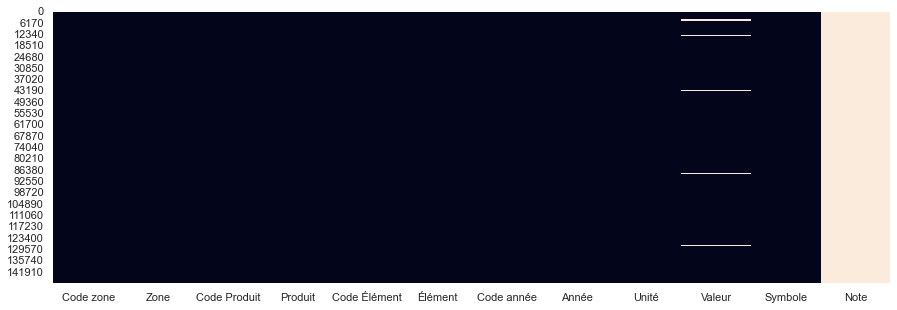

In [15]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isna(), cbar=False)

In [16]:
### Le jeu de donnée est bon pour analyse, les variables contiennent de l'information et peu de champs sont vides !

In [17]:
# Vérifications avec .describe en incluant les variables qualitatives :
df.describe(include='all')

,Code zone,Zone,Code Produit,Produit,Code Élément,Élément,Code année,Année,Unité,Valeur,Symbole,Note
count,148060.000000,148060,148060.000000,148060,148060.000000,148060,1.480600e+05,148060,148060,142901,148060,0.0
unique,NaN,250,NaN,48,NaN,1,NaN,40,10,10850,4,NaN
top,NaN,Bangladesh,NaN,Besoins énergétiques alimentaires minimaux (kc...,NaN,Valeur,NaN,2014,%,<0.1,F,NaN
freq,NaN,718,NaN,5018,NaN,148060,NaN,4985,68510,3724,77907,NaN
mean,1095.050520,NaN,66973.918053,NaN,6125.911651,NaN,7.273468e+06,NaN,NaN,NaN,NaN,NaN
std,2103.479608,NaN,81054.325753,NaN,8.823435,NaN,9.655081e+06,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,21010.000000,NaN,6121.000000,NaN,2.000000e+03,NaN,NaN,NaN,NaN,NaN
25%,81.000000,NaN,21032.000000,NaN,6121.000000,NaN,2.008000e+03,NaN,NaN,NaN,NaN,NaN
50%,155.000000,NaN,21048.000000,NaN,6123.000000,NaN,2.015000e+03,NaN,NaN,NaN,NaN,NaN
75%,234.000000,NaN,22013.000000,NaN,6128.000000,NaN,2.006201e+07,NaN,NaN,NaN,NaN,NaN


# 148 060 occurences de données concernant 250 "Zone" ainsi que 48 variables "Produit" différentes pour caractériser ces zones.

#### Quelques informations mais beaucoup de NaN perturbent cependant notre visibilité ... Nous réaliserons du nettoyage !

In [18]:
df.head(3)

,Code zone,Zone,Code Produit,Produit,Code Élément,Élément,Code année,Année,Unité,Valeur,Symbole,Note
0,2,Afghanistan,21010,Suffisance des apports énergétiques alimentair...,6121,Valeur,20002002,2000-2002,%,87,F,NaN
1,2,Afghanistan,21010,Suffisance des apports énergétiques alimentair...,6121,Valeur,20012003,2001-2003,%,88,F,NaN
2,2,Afghanistan,21010,Suffisance des apports énergétiques alimentair...,6121,Valeur,20022004,2002-2004,%,91,F,NaN


#### Colonnes à supprimer : Code zone / Code Produit / Code Élément / Élément / Symbole / Note, nous le ferons avec un filtre
#### 2 colonnes temporelles avec des formats différents nous filtrerons 2017
#### Nous notons l'intérêt d'explorer la colonne Produit, un grand nombre de variables informatives

In [19]:
df.info() # Vérification routinière : Typologie des variables & comptage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148060 entries, 0 to 148059
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Code zone     148060 non-null  int64  
 1   Zone          148060 non-null  object 
 2   Code Produit  148060 non-null  int64  
 3   Produit       148060 non-null  object 
 4   Code Élément  148060 non-null  int64  
 5   Élément       148060 non-null  object 
 6   Code année    148060 non-null  int64  
 7   Année         148060 non-null  object 
 8   Unité         148060 non-null  object 
 9   Valeur        142901 non-null  object 
 10  Symbole       148060 non-null  object 
 11  Note          0 non-null       float64
dtypes: float64(1), int64(4), object(7)
memory usage: 13.6+ MB


#### La colonne Valeur contient 142 901 enregistrements alors que les autres variables en contiennent 148 060 nous le traiterons au nettoyage.

### Étude rapide des formats temporels du jeu de donnée global :

In [20]:
# Deux colonnes qualifiaient le temps, analysons les :

df['Code année'].unique()

array([20002002, 20012003, 20022004, 20032005, 20042006, 20052007,
       20062008, 20072009, 20082010, 20092011, 20102012, 20112013,
       20122014, 20132015, 20142016, 20152017, 20162018, 20172019,
       20182020,     2002,     2003,     2004,     2005,     2006,
           2007,     2008,     2009,     2010,     2011,     2012,
           2013,     2014,     2015,     2016,     2017,     2018,
           2019,     2020,     2000,     2001], dtype=int64)

In [21]:
df['Année'].unique()

array(['2000-2002', '2001-2003', '2002-2004', '2003-2005', '2004-2006',
       '2005-2007', '2006-2008', '2007-2009', '2008-2010', '2009-2011',
       '2010-2012', '2011-2013', '2012-2014', '2013-2015', '2014-2016',
       '2015-2017', '2016-2018', '2017-2019', '2018-2020', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2000', '2001'], dtype=object)

### Récupération des données 2017, filtrages des colonnes et conservation des informations pertinentes :

In [22]:
# Recherche de tous les champs représentant 2017 dans les deux colonnes :

df = df.loc[(df['Code année'] == "20162018") |
                (df['Code année'] == 2017) |
                (df['Année'] == "2016-2018") |
                (df['Année'] == 2017),
                    ['Zone','Produit','Valeur']]

In [23]:
# Calcul du nombre total de NaN restants :

In [24]:
total_nan_values = df.isnull().sum().sum()
print (total_nan_values)

611


### Filtrage des symboles < dans la colonne Valeur, passage en float et signalisation des lignes dont la valeur a été tronquée :

In [25]:
# Recherche des variables comportant "<"

df['Valeur_Tronquée'] = df['Valeur'].str.contains('<')

In [26]:
# Utilisation str.replace pour remplacer les signes "<" par " " et changement du type de variable avec .astype()

df['Valeur'] = df['Valeur'].str.replace('<','').astype(float)

In [27]:
df.head(45)

,Zone,Produit,Valeur,Valeur_Tronquée
16,Afghanistan,Suffisance des apports énergétiques alimentair...,106.00,False
35,Afghanistan,Valeur moyenne de la production alimentaire ($...,33.00,False
52,Afghanistan,Disponibilité alimentaire par habitant utilisé...,2266.00,False
71,Afghanistan,"Part des céréales, des racines et des tubercul...",74.00,False
88,Afghanistan,Disponibilités protéiques moyennes (g/personne...,55.70,False
105,Afghanistan,Disponibilités protéines moyennes dorigine an...,10.70,False
121,Afghanistan,"PIB par habitant, ($ PPA internationaux consta...",2058.40,False
141,Afghanistan,Prévalence de la sous-alimentation (%) (moyenn...,23.00,False
160,Afghanistan,Nombre de personnes sous-alimentées (millions)...,8.30,False
165,Afghanistan,Prévalence de linsécurité alimentaire grave ...,17.30,False


<AxesSubplot:>

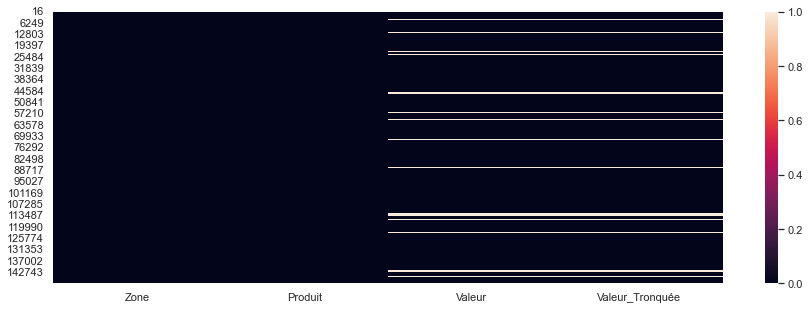

In [28]:
# Visualtion des Nan restants :

plt.figure(figsize=(15,5))
sns.heatmap(df.isna())

### Retrait des Nan :

In [29]:
df = df.dropna()

In [30]:
df.shape # Il nous reste 7275 lignes de données

(7275, 4)

In [31]:
df.Produit.describe()

count                                                  7275
unique                                                   44
top       Valeur moyenne de la production alimentaire ($...
freq                                                    247
Name: Produit, dtype: object

In [32]:
# Aperçu
df.head(5)

,Zone,Produit,Valeur,Valeur_Tronquée
16,Afghanistan,Suffisance des apports énergétiques alimentair...,106.0,False
35,Afghanistan,Valeur moyenne de la production alimentaire ($...,33.0,False
52,Afghanistan,Disponibilité alimentaire par habitant utilisé...,2266.0,False
71,Afghanistan,"Part des céréales, des racines et des tubercul...",74.0,False
88,Afghanistan,Disponibilités protéiques moyennes (g/personne...,55.7,False


## Extraction des données mondiales et création d'un dataframe pour les stocker :
### df_Monde_AnalyseGlobale

In [33]:
df_Monde_AnalyseGlobale = df.loc[df['Zone'] == "Monde", ("Produit",'Valeur')]

In [34]:
df_Monde_AnalyseGlobale.shape

(37, 2)

In [35]:
df_Monde_AnalyseGlobale

,Produit,Valeur
120714,Suffisance des apports énergétiques alimentair...,123.0
120733,Valeur moyenne de la production alimentaire ($...,103.0
120750,Disponibilité alimentaire par habitant utilisé...,2934.0
120769,"Part des céréales, des racines et des tubercul...",49.0
120786,Disponibilités protéiques moyennes (g/personne...,80.1
120803,Disponibilités protéines moyennes dorigine an...,31.6
120823,"PIB par habitant, ($ PPA internationaux consta...",16242.9
120843,Prévalence de la sous-alimentation (%) (moyenn...,8.2
120863,Prévalence de la sous-alimentation (%) (valeur...,8.1
120883,Nombre de personnes sous-alimentées (millions)...,622.7


In [36]:
# **********************************************************************************************************
# Fin de nettoyage des données FAO téléchargées
#
#      DataFrame créés :
#
#              df                       df_Monde_AnalyseGlobale

# -------------------------------------------------------------------------------------------
# NETTOYAGE DE DONNÉES :
# ---------------------------------- jeu de données ancien Data Analyst ----

### Taille des jeux de données (Lignes, Colonnes) :

In [37]:
aide_alimentaire.shape

(1475, 3)

In [38]:
dispo_alimentaire.shape

(15605, 17)

In [39]:
population.shape

(1416, 2)

In [40]:
sous_nutrition.shape

(1218, 2)

## Filtrage temporel sous_nutrition[] et population[] :

In [41]:
sous_nutrition['Année'].unique()

array(['2012-2014', '2013-2015', '2014-2016', '2015-2017', '2016-2018',
       '2017-2019'], dtype=object)

In [42]:
sous_nutrition = sous_nutrition.loc[sous_nutrition['Année'] == "2016-2018",:]
population = population.loc[population['Année'] == 2017]

In [43]:
sous_nutrition = sous_nutrition.dropna()
population = population.dropna()

### Détection d'un problème, les signes '<' peuvent erroner les proportions représentées en millions par l'imprécision de l'indicateur sur les pays à faible population.

### Annotation des Valeurs tronquées en créant une variable, on l'utilisera pour le "hue=" dans Seaborn :

In [44]:
# Recherche des variables comportant "<"

sous_nutrition['Valeur_Tronquée'] = sous_nutrition['Valeur'].str.contains('<')

#### Vérification de la prise en compte des valeurs tronquées dans le DataFrame :

In [45]:
sous_nutrition['Valeur_Tronquée']

Zone
Afghanistan                               False
Afrique du Sud                            False
Albanie                                   False
Algérie                                   False
Angola                                    False
                                          ...  
Turkménistan                              False
Ukraine                                   False
Vanuatu                                    True
Venezuela (République bolivarienne du)    False
Viet Nam                                  False
Name: Valeur_Tronquée, Length: 104, dtype: bool

In [46]:
# Nbre de pays dont nous tronquons les représentations :

sous_nutrition.loc[sous_nutrition['Valeur_Tronquée'] == True, :].shape

(20, 3)

#### Visualisation des Pays où nous aurons une contrainte de précision :

In [47]:
sous_nutrition.loc[sous_nutrition['Valeur_Tronquée'] == True, :]

,Année,Valeur,Valeur_Tronquée
Zone,,,
Arménie,2016-2018,<0.1,True
Barbade,2016-2018,<0.1,True
Belize,2016-2018,<0.1,True
Cabo Verde,2016-2018,<0.1,True
Chine - RAS de Macao,2016-2018,<0.1,True
Chypre,2016-2018,<0.1,True
Dominique,2016-2018,<0.1,True
Fidji,2016-2018,<0.1,True
Guyana,2016-2018,<0.1,True


#### Supression des signes "<" du jeu de données pour pouvoir classer nos données :

In [48]:
# Utilisation str.replace pour remplacer les signes "<" par " " et changement du type de variable avec .astype()

sous_nutrition['Valeur'] = sous_nutrition['Valeur'].str.replace('<','').astype(float)

In [49]:
# On renomme notre colonne pour les visualisations

sous_nutrition.rename(columns = {'Valeur' : 'Nbre_de_Personnes_en_sous_nutri(en_millions)'}, inplace=True)

In [50]:
sous_nutrition.head(10) # Aperçu du DataFrame obtenu

,Année,Nbre_de_Personnes_en_sous_nutri(en_millions),Valeur_Tronquée
Zone,,,
Afghanistan,2016-2018,10.5,False
Afrique du Sud,2016-2018,3.1,False
Albanie,2016-2018,0.1,False
Algérie,2016-2018,1.3,False
Angola,2016-2018,5.8,False
Arabie saoudite,2016-2018,1.6,False
Argentine,2016-2018,1.5,False
Arménie,2016-2018,0.1,True
Bangladesh,2016-2018,21.5,False


### On nettoie les colonnes de nos DataFrames :

In [51]:
sous_nutrition = sous_nutrition.drop(columns=['Année'])

In [52]:
population = population.drop(columns=['Année'])

In [53]:
population.loc[population.index == "France", :] # Aperçu rapide

,Valeur
Zone,
France,64842.509


In [54]:
population = population.rename(columns = {'Valeur' : 'Valeurs_en_milliers_habitants'})

In [55]:
population['Valeurs_en_millions_habitants'] = population['Valeurs_en_milliers_habitants']/1000
population.head()

,Valeurs_en_milliers_habitants,Valeurs_en_millions_habitants
Zone,,
Afghanistan,36296.113,36.296113
Afrique du Sud,57009.756,57.009756
Albanie,2884.169,2.884169
Algérie,41389.189,41.389189
Allemagne,82658.409,82.658409


## On tri les valeurs de nos data sets en prévision de l'affichage de graphiques :

In [56]:
sous_nutrition = sous_nutrition.sort_values(by=['Nbre_de_Personnes_en_sous_nutri(en_millions)'], ascending=False)

In [57]:
population = population.sort_values(by=['Valeurs_en_milliers_habitants'], ascending=False)

In [58]:
# Nombre de personnes dans la base de données en millions :
PopTotale = population['Valeurs_en_milliers_habitants'].sum()/1000

In [59]:
# Visualisation de la variable crée :

population['%_de_pop_mondiale'] = (population['Valeurs_en_millions_habitants']/PopTotale)*100
population["%_de_pop_mondiale"].astype(float).head(10)

Zone
Chine, continentale      18.826133
Inde                     17.735201
États-Unis d'Amérique     4.306823
Indonésie                 3.506177
Pakistan                  2.754405
Brésil                    2.753446
Nigéria                   2.528747
Bangladesh                2.115562
Fédération de Russie      1.928027
Japon                     1.689195
Name: %_de_pop_mondiale, dtype: float64

In [60]:
population.head(8)

,Valeurs_en_milliers_habitants,Valeurs_en_millions_habitants,%_de_pop_mondiale
Zone,,,
"Chine, continentale",1421021.791,1421.021791,18.826133
Inde,1338676.785,1338.676785,17.735201
États-Unis d'Amérique,325084.756,325.084756,4.306823
Indonésie,264650.963,264.650963,3.506177
Pakistan,207906.209,207.906209,2.754405
Brésil,207833.823,207.833823,2.753446
Nigéria,190873.244,190.873244,2.528747
Bangladesh,159685.424,159.685424,2.115562


# ***************************************************
# Fin de nettoyage des données de l'ancien Data Analyst
# ***************************************************

# ---------------------------------------------------------------------------------------------------------
# NETTOYAGE DE DONNÉES :
# -------  Analyse variables disponibles  ----------------- jeu de données global ---


### La colonne Produit représente les variables consultables avec Zone = Monde :

In [61]:
# Visualisation des données disponibles :
df_Monde_AnalyseGlobale

,Produit,Valeur
120714,Suffisance des apports énergétiques alimentair...,123.0
120733,Valeur moyenne de la production alimentaire ($...,103.0
120750,Disponibilité alimentaire par habitant utilisé...,2934.0
120769,"Part des céréales, des racines et des tubercul...",49.0
120786,Disponibilités protéiques moyennes (g/personne...,80.1
120803,Disponibilités protéines moyennes dorigine an...,31.6
120823,"PIB par habitant, ($ PPA internationaux consta...",16242.9
120843,Prévalence de la sous-alimentation (%) (moyenn...,8.2
120863,Prévalence de la sous-alimentation (%) (valeur...,8.1
120883,Nombre de personnes sous-alimentées (millions)...,622.7


In [62]:
# Afin de lire même les variables longues, modifications d'affichage :
df_Monde_AnalyseGlobale.Produit.unique()

array(['Suffisance des apports énergétiques alimentaires moyens (%) (moyenne sur 3 ans)',
       'Valeur moyenne de la production alimentaire ($I constants par personne) (moyenne sur 3 ans)',
       "Disponibilité alimentaire par habitant utilisée dans l'estimation de la prévalence de la sous-alimentation (kcal/personne/jour) (moyenne sur 3 ans)",
       'Part des céréales, des racines et des tubercules dans les apports énergétiques alimentaires (%) (moyenne sur 3 ans)',
       'Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)',
       'Disponibilités protéines moyennes d\x92origine animale (g/personne/jour) (moyenne sur 3 ans)',
       'PIB par habitant, ($ PPA internationaux constants de 2011)',
       'Prévalence de la sous-alimentation (%) (moyenne sur 3 ans)',
       'Prévalence de la sous-alimentation (%) (valeur annuelle)',
       'Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)',
       'Nombre de personnes sous-alimentées (millions) (

In [63]:
# Détection des variables intéressantes pour notre première analyse :

  # Variables retenues :
    
    # Nous récupérons beaucoup d'informations mais le dataframe pourra être réutilisé à l'avenir...
    
        # 'Prévalence de la sous-alimentation (%) (moyenne sur 3 ans)'
        # 'Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)'
        # 'Prévalence de l\x92insécurité alimentaire grave \x96 population totale (%) (moyenne sur 3 ans)'
        # 'Prévalence de l\x92insécurité alimentaire modérée ou grave \x96 population totale (%) (moyenne sur 3 ans)'
        # 'Suffisance des apports énergétiques alimentaires moyens (%) (moyenne sur 3 ans)'
            # 'Valeur moyenne de la production alimentaire ($I constants par personne) (moyenne sur 3 ans)'
            # 'Besoins énergétiques alimentaires minimaux (kcal/personne/jour)'
            # 'Besoins énergétiques alimentaires moyens (kcal/personne/jour)'
            # 'Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)'
            # 'Disponibilités protéines moyennes d\x92origine animale (g/personne/jour) (moyenne sur 3 ans)'
            # 'Disponibilités moyennes de matière grasse (g/personne/jour) (moyenne sur 3 ans)'
            
        # "Pourcentage des terres arables aménagées pour l'irrigation (%) (moyenne sur 3 ans)"
        # 'Part des céréales, des racines et des tubercules dans les apports énergétiques alimentaires (%) (moyenne sur 3 ans)'
        # "Taux de dépendance à l'égard des importations céréalières (%) (moyenne sur 3 ans)"
        # 'Valeur des importations alimentaires par rapport aux exportations totales de marchandises (%) (moyenne sur 3 ans)'

In [64]:
df.head()

,Zone,Produit,Valeur,Valeur_Tronquée
16,Afghanistan,Suffisance des apports énergétiques alimentair...,106.0,False
35,Afghanistan,Valeur moyenne de la production alimentaire ($...,33.0,False
52,Afghanistan,Disponibilité alimentaire par habitant utilisé...,2266.0,False
71,Afghanistan,"Part des céréales, des racines et des tubercul...",74.0,False
88,Afghanistan,Disponibilités protéiques moyennes (g/personne...,55.7,False


In [65]:
plt.figure(figsize=(20,30))

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

In [66]:
df_prevalence_sous_alim = df.loc[df['Produit'] == "Prévalence de la sous-alimentation (%) (moyenne sur 3 ans)", :]

In [67]:
df_prevalence_sous_alim = df_prevalence_sous_alim.sort_values('Valeur', ascending=True)

# Création d'un dataframe avec les enfants en sous-nutrition
dftest_Enfants = df.loc[df['Produit'] == "Nombre d'enfants de moins de 5 ans présentant un retard de croissance (estimation modélisée) (millions)",:].sort_values(by=['Valeur'], ascending=True)

In [68]:
# ********************************************************************************************************************

In [69]:
# Liste des DataFrame créés :
    # df        (Extraction du jeu de données complet FOA /Année 2017 et nettoyage rapide)
    # sous_nutrition        (Données nettoyées qu'on a récupéré de l'ancien Data Analyst)
    # dispo_alimentaire       (Données nettoyées qu'on a récupéré de l'ancien Data Analyst)
    # population      (Données nettoyées qu'on a récupéré de l'ancien Data Analyst)
    # aide_alimentaire      (Données nettoyées qu'on a récupéré de l'ancien Data Analyst)
    # df_Monde_AnalyseGlobale (Isolation des moyennes et sommes mondiales dans un dataframe)     
    # df_prevalence_sous_alim     (Isolation des données sur les pays avec les % de sous-nutrition les plus élevés)
    # dftest_enfants (Isolation des données relatives aux enfants de moins de 5 ans avec un retard de croissance)

In [70]:
sous_nutrition

,Nbre_de_Personnes_en_sous_nutri(en_millions),Valeur_Tronquée
Zone,,
Inde,190.1,False
Pakistan,24.8,False
Indonésie,23.6,False
Nigéria,22.8,False
Bangladesh,21.5,False
...,...,...
Fidji,0.1,True
Guyana,0.1,True
Polynésie française,0.1,True


In [71]:
dispo_alimentaire

,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [72]:
df

,Zone,Produit,Valeur,Valeur_Tronquée
16,Afghanistan,Suffisance des apports énergétiques alimentair...,106.0,False
35,Afghanistan,Valeur moyenne de la production alimentaire ($...,33.0,False
52,Afghanistan,Disponibilité alimentaire par habitant utilisé...,2266.0,False
71,Afghanistan,"Part des céréales, des racines et des tubercul...",74.0,False
88,Afghanistan,Disponibilités protéiques moyennes (g/personne...,55.7,False
...,...,...,...,...
147962,Upper-middle-income economies,Prévalence de l'anémie chez la femme en âge de...,19.1,False
147982,Upper-middle-income economies,Nombre de femmes en âge de procréer (15-49 ans...,14.1,False
148019,Upper-middle-income economies,Besoins énergétiques alimentaires minimaux (kc...,1868.0,False
148039,Upper-middle-income economies,Besoins énergétiques alimentaires moyens (kcal...,2420.0,False


# ------------------------------------------------------------------------------------
# EXPLORATION DE DONNÉES :
# ----------------------------------------------- jeu de données global ----


# 1 / Proportion de personnes en état de sous-nutrition :

#  -----------------      ANALYSES SUR LES QUANTITÉS :   --------------------


# Proportion de la sous-nutrition par Zones mondiales :


## On indexe en orange les valeurs tronquées afin de les représenter en proportion

In [73]:
# ************************       Vue mondiale :      **********************************

In [74]:
sous_nutrition.head(10)

,Nbre_de_Personnes_en_sous_nutri(en_millions),Valeur_Tronquée
Zone,,
Inde,190.1,False
Pakistan,24.8,False
Indonésie,23.6,False
Nigéria,22.8,False
Bangladesh,21.5,False
Éthiopie,21.1,False
Philippines,15.7,False
République-Unie de Tanzanie,13.4,False
République populaire démocratique de Corée,12.0,False


In [75]:
df_qté_sous_nutrition = df.loc[df['Produit']=="Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)",: ]

In [76]:
df_qté_sous_nutrition

,Zone,Produit,Valeur,Valeur_Tronquée
160,Afghanistan,Nombre de personnes sous-alimentées (millions)...,8.3,False
794,Afrique du Sud,Nombre de personnes sous-alimentées (millions)...,3.1,False
1440,Albanie,Nombre de personnes sous-alimentées (millions)...,0.1,False
2138,Algérie,Nombre de personnes sous-alimentées (millions)...,1.1,False
3740,Angola,Nombre de personnes sous-alimentées (millions)...,4.6,False
...,...,...,...,...
144712,Petites îles en voie de Développement,Nombre de personnes sous-alimentées (millions)...,10.1,False
145289,Pays à faible revenu et à déficit vivrier,Nombre de personnes sous-alimentées (millions)...,433.3,False
145714,Pays à faible revenu,Nombre de personnes sous-alimentées (millions)...,176.9,False
146350,Pays à revenu moyen,Nombre de personnes sous-alimentées (millions)...,343.6,False


In [77]:
df_all = pd.concat([df_qté_sous_nutrition.set_index('Zone'), sous_nutrition], 
                   axis='columns', keys=['First', 'Second'])
df_all.head(25)

First  \
                                                                           Produit   
Zone                                                                                 
Afghanistan                      Nombre de personnes sous-alimentées (millions)...   
Afrique du Sud                   Nombre de personnes sous-alimentées (millions)...   
Albanie                          Nombre de personnes sous-alimentées (millions)...   
Algérie                          Nombre de personnes sous-alimentées (millions)...   
Angola                           Nombre de personnes sous-alimentées (millions)...   
Arabie saoudite                  Nombre de personnes sous-alimentées (millions)...   
Argentine                        Nombre de personnes sous-alimentées (millions)...   
Arménie                          Nombre de personnes sous-alimentées (millions)...   
Bangladesh                       Nombre de personnes sous-alimentées (millions)...   
Barbade                          Nombre de personnes sous-alimentées (millions)...   
Belize                           Nombre de personnes sous-alimentées (millions)...   
Bénin                            Nombre de personnes sous-alimentées (millions)...   
Bolivie (État plurinational de)  Nombre de personnes sous-alimentées (millions)...   
Botswana                         Nombre de personnes sous-alimentées (millions)...   
Bulgarie                         Nombre de personnes sous-alimentées (millions)...   
Burkina Faso                     Nombre de personnes sous-alimentées (millions)...   
Cabo Verde                       Nombre de personnes sous-alimentées (millions)...   
Cambodge                         Nombre de personnes sous-alimentées (millions)...   
Cameroun                         Nombre de personnes sous-alimentées (millions)...   
Chili                            Nombre de personnes sous-alimentées (millions)...   
Chine - RAS de Macao             Nombre de personnes sous-alimentées (millions)...   
Chine, Taiwan Province de        Nombre de personnes sous-alimentées (millions)...   
Colombie                         Nombre de personnes sous-alimentées (millions)...   
Congo                            Nombre de personnes sous-alimentées (millions)...   
Costa Rica                       Nombre de personnes sous-alimentées (millions)...   

                                                        \
                                Valeur Valeur_Tronquée   
Zone                                                     
Afghanistan                        8.3           False   
Afrique du Sud                     3.1           False   
Albanie                            0.1           False   
Algérie                            1.1           False   
Angola                             4.6           False   
Arabie saoudite                    1.2           False   
Argentine                          1.4           False   
Arménie                            0.1            True   
Bangladesh                        20.0           False   
Barbade                            0.1            True   
Belize                             0.1            True   
Bénin                              0.8           False   
Bolivie (État plurinational de)    1.4           False   
Botswana                           0.6           False   
Bulgarie                           0.2           False   
Burkina Faso                       2.4           False   
Cabo Verde                         0.1            True   
Cambodge                           1.2           False   
Cameroun                           1.4           False   
Chili                              0.6           False   
Chine - RAS de Macao               0.1            True   
Chine, Taiwan Province de          0.9           False   
Colombie                           3.5           False   
Congo                              1.8           False   
Costa Rica                         0.2           False   

                                           

# Pays avec les plus fortes proportions de sous-nutrition au monde :

In [78]:
df_prevalence_sous_alim = df_prevalence_sous_alim.rename(columns={'Valeur' : '%_de_pop_en_sous_nutrition'})
df_prevalence_sous_alim = df_prevalence_sous_alim.sort_values(by = "%_de_pop_en_sous_nutrition", ascending=False)
df_prevalence_sous_alim.head(10)

,Zone,Produit,%_de_pop_en_sous_nutrition,Valeur_Tronquée
104491,Somalie,Prévalence de la sous-alimentation (%) (moyenn...,58.7,False
47328,Haïti,Prévalence de la sous-alimentation (%) (moyenn...,48.0,False
118889,Yémen,Prévalence de la sous-alimentation (%) (moyenn...,46.6,False
90309,République centrafricaine,Prévalence de la sous-alimentation (%) (moyenn...,46.1,False
94264,République populaire démocratique de Corée,Prévalence de la sous-alimentation (%) (moyenn...,42.9,False
65385,Madagascar,Prévalence de la sous-alimentation (%) (moyenn...,42.3,False
92319,République démocratique du Congo,Prévalence de la sous-alimentation (%) (moyenn...,40.2,False
52202,Iraq,Prévalence de la sous-alimentation (%) (moyenn...,37.9,False
62436,Libéria,Prévalence de la sous-alimentation (%) (moyenn...,36.6,False
26799,Congo,Prévalence de la sous-alimentation (%) (moyenn...,36.0,False


# Analyse sur les Proportions Nationales en matière de sous-nutrition :

C:\Users\cyril\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Proportion de sous-nutrition et panoramas nationaux')

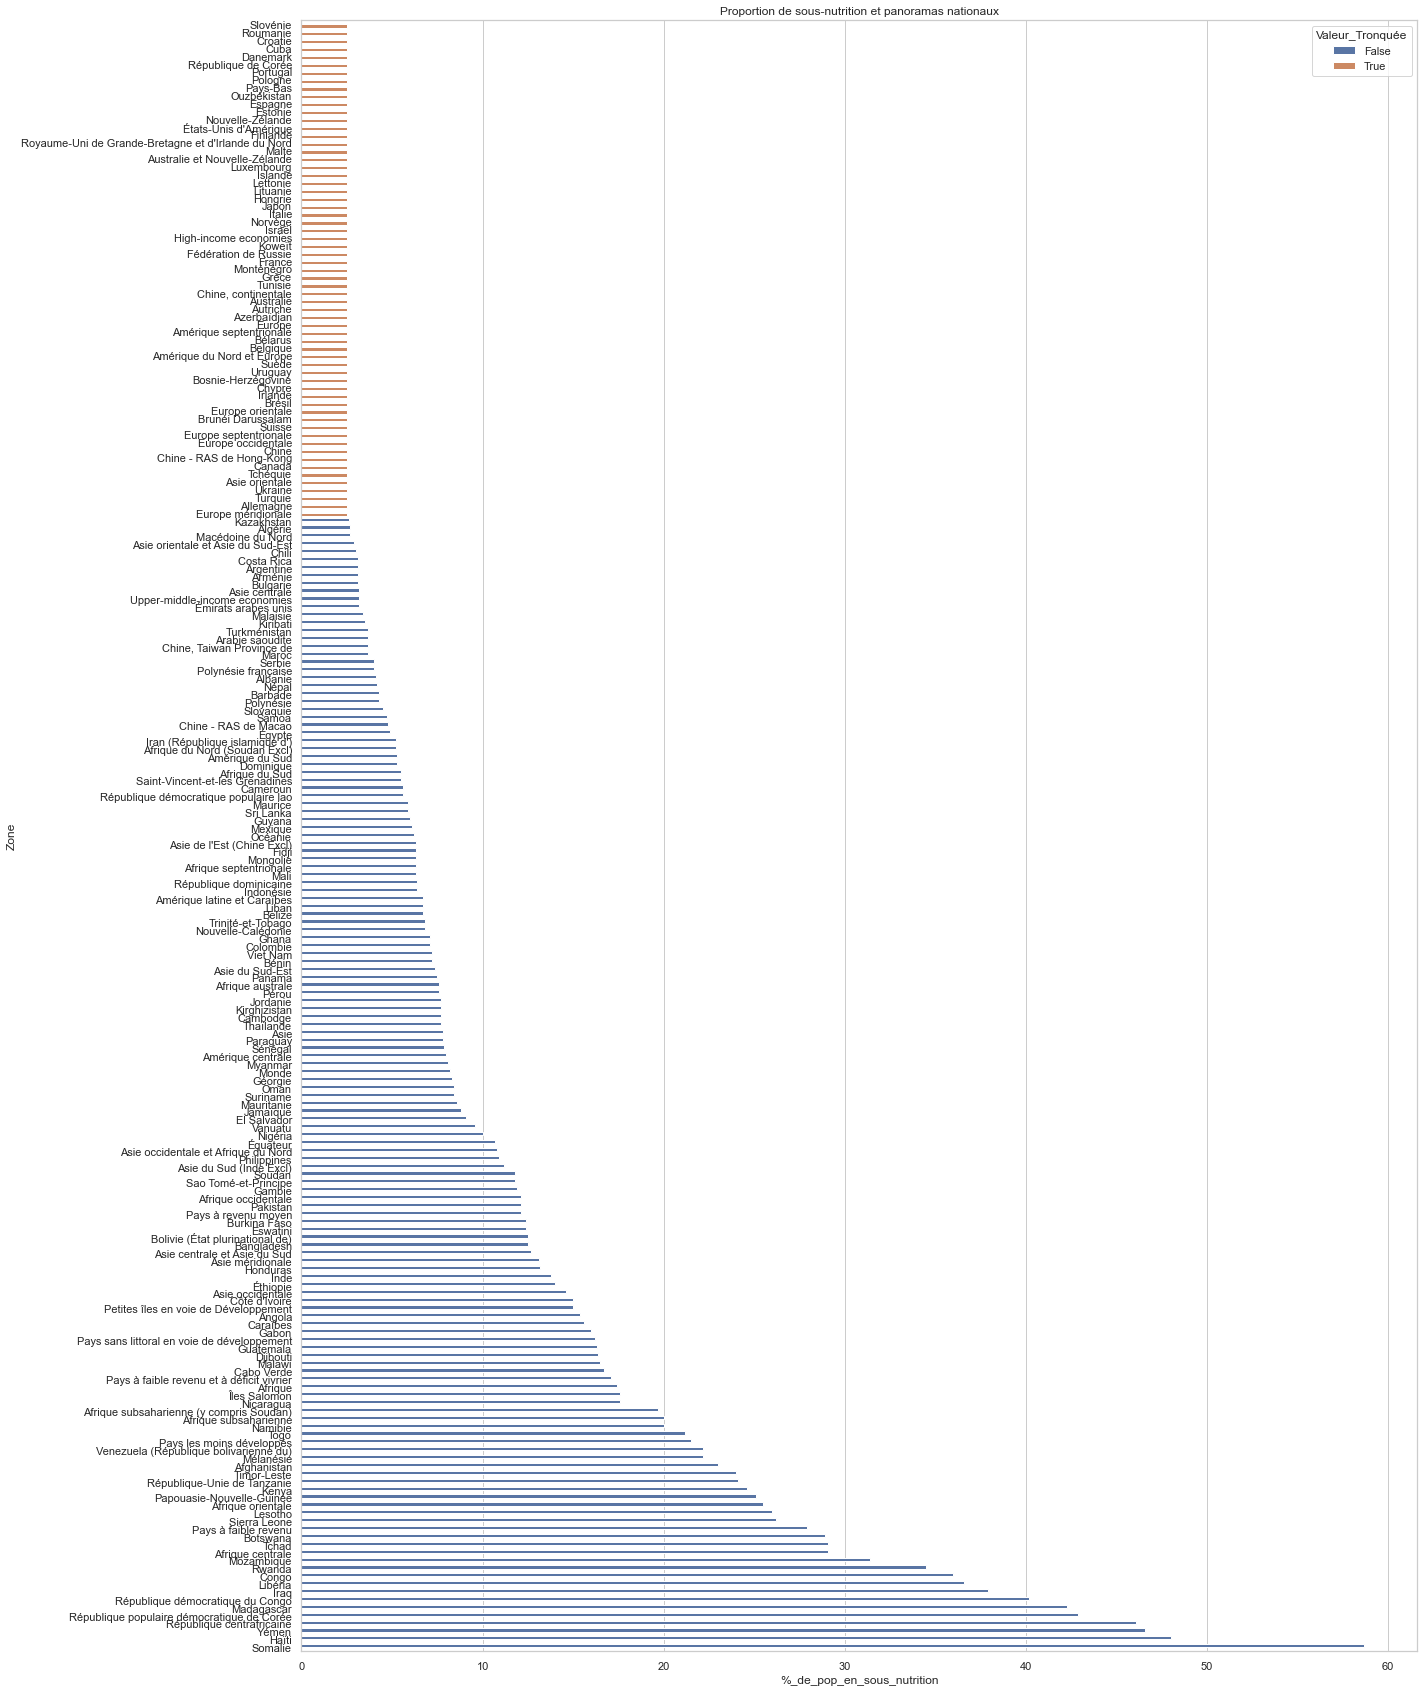

In [79]:
df_prevalence_sous_alim = df_prevalence_sous_alim.sort_values(by = "%_de_pop_en_sous_nutrition", ascending=True)
plt.figure(figsize=(20,30))
sns.barplot('%_de_pop_en_sous_nutrition', "Zone" ,data = df_prevalence_sous_alim, hue= "Valeur_Tronquée").set_title("Proportion de sous-nutrition et panoramas nationaux")

In [80]:
# *********************************************************************************************
# **********************************  Coeur-de-cible du phénomène  ****************************
# *********************************************************************************************

# Filtrage des pays disposant de la proportion de personnes en sous-nutrition la plus importante :

In [81]:
# Sélection des pays où plus de 15 % de la population est en sous-nutrition :

df_prevalence_sous_alim_CoeurCible = df_prevalence_sous_alim.loc[df_prevalence_sous_alim["%_de_pop_en_sous_nutrition"] > 15,:].sort_values("%_de_pop_en_sous_nutrition", ascending=False)

C:\Users\cyril\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Pays où la proportion de la sous-nutrition est la plus importante')

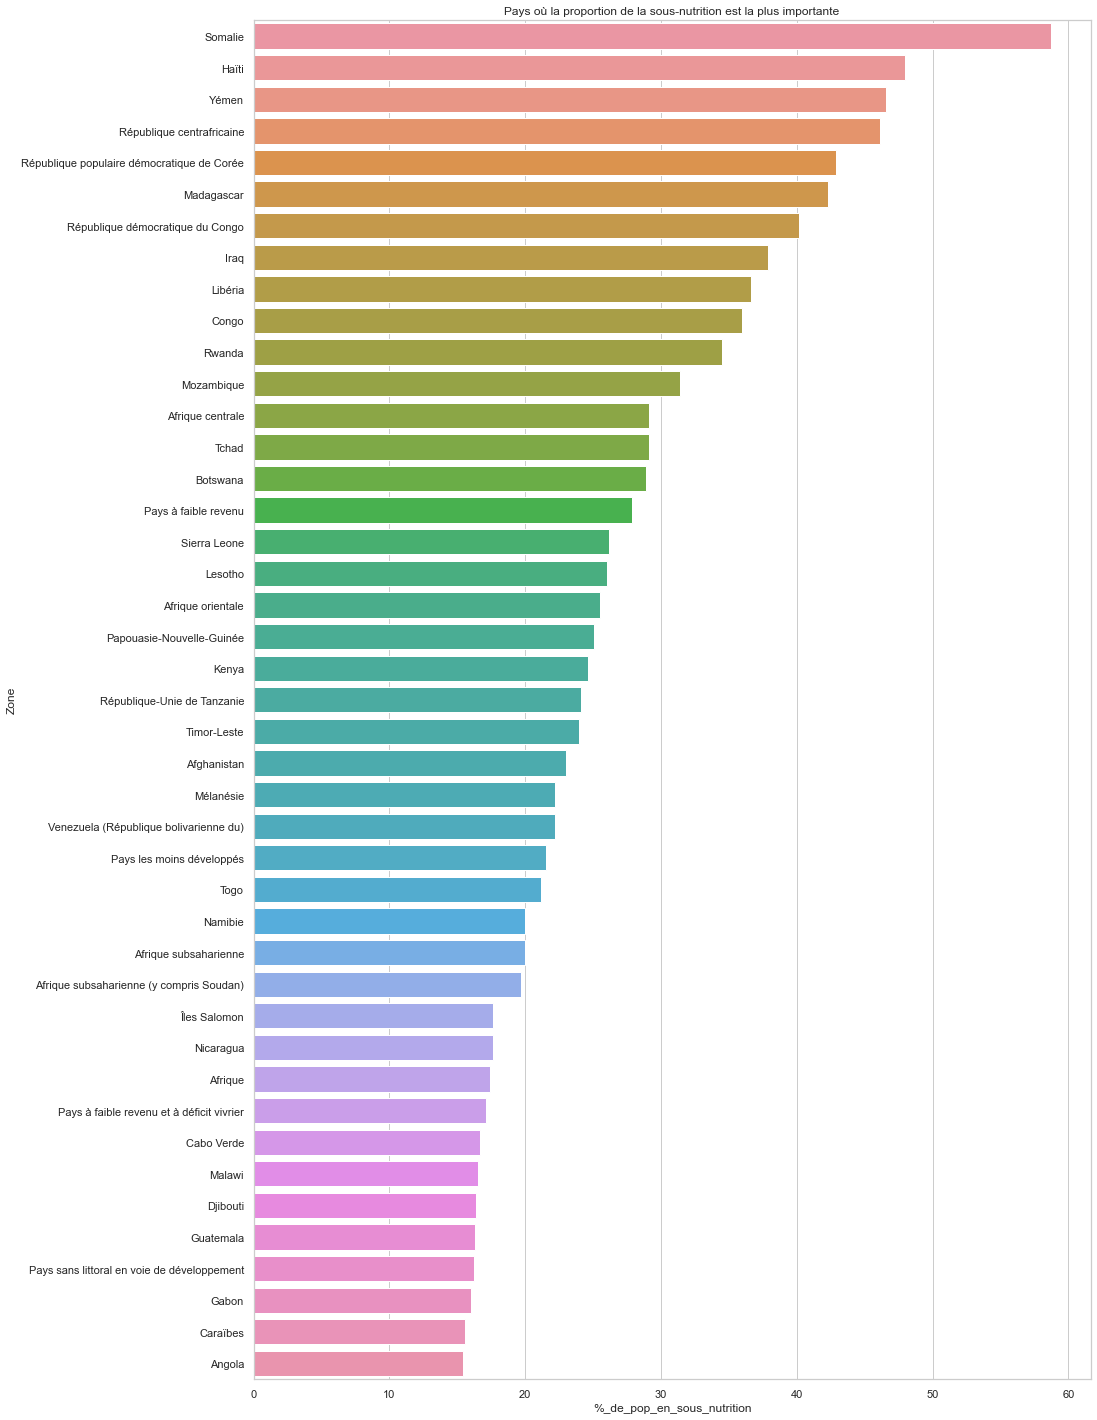

In [82]:
plt.figure(figsize=(15,25))
sns.barplot(df_prevalence_sous_alim_CoeurCible["%_de_pop_en_sous_nutrition"], df_prevalence_sous_alim_CoeurCible.Zone).set_title("Pays où la proportion de la sous-nutrition est la plus importante")

#  ----------        ANALYSES EN DÉNOMBRABLES SUR LES QUANTITÉS :   ---------

# Répartition du nombre de personnes sous-nourries :

In [83]:
# Préparation des variables :
df_Nbre_Personnes_Sous_Alim = df.loc[df["Produit"] == "Nombre de personnes sous-alimentées (millions) (valeur annuelle)", :]
df_Nbre_Personnes_Sous_Alim.rename(columns={ 'Valeur': "Nbre_de_pers_en_sous_nutrition_par_ensemble_analysé_(en_millions)"}, inplace=True)

C:\Users\cyril\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [84]:
df_Nbre_Personnes_Sous_Alim = df_Nbre_Personnes_Sous_Alim.sort_values(by=["Nbre_de_pers_en_sous_nutrition_par_ensemble_analysé_(en_millions)"],ascending=False)

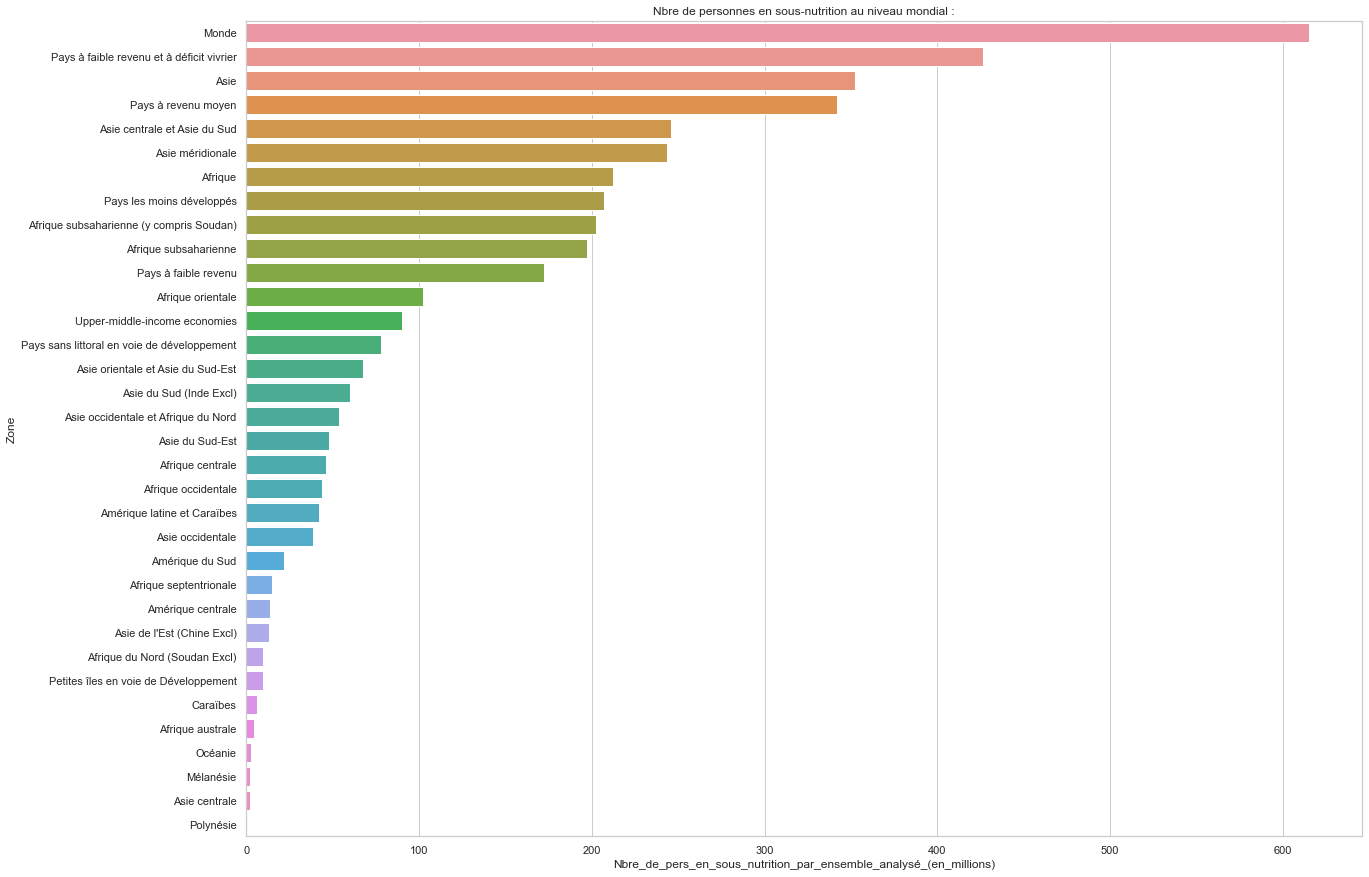

In [85]:
plt.figure(figsize=(20, 15))
sns.barplot(x='Nbre_de_pers_en_sous_nutrition_par_ensemble_analysé_(en_millions)',y="Zone", data=df_Nbre_Personnes_Sous_Alim).set_title("Nbre de personnes en sous-nutrition au niveau mondial :");

# Autres calculs sur Données MONDIALES :

In [86]:
# Nombre de personnes souffrantes de malnutrition dans les monde :
df_Monde_AnalyseGlobale.loc[df_Monde_AnalyseGlobale['Produit'] == "Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)", :]

,Produit,Valeur
120883,Nombre de personnes sous-alimentées (millions)...,622.7


# 622,7 millions de personnes sous-nourries dans le monde en 2017

In [87]:
# Proportion de la population mondiale souffrante de mal-nutrition :
df_Monde_AnalyseGlobale.loc[df_Monde_AnalyseGlobale['Produit'] == "Prévalence de la sous-alimentation (%) (moyenne sur 3 ans)", :]

,Produit,Valeur
120843,Prévalence de la sous-alimentation (%) (moyenn...,8.2


In [125]:
(sous_nutrition['Nbre_de_Personnes_en_sous_nutri(en_millions)'].sum()) / population['Valeurs_en_millions_habitants'].sum()*100

7.1236148178183845

# Le pourcentage moyen de personnes en sous-nutrition calculé avec les anciennes données du data analyst est biaisé à cause des troncatures, il indique 7,12%.

In [123]:
population

,Valeurs_en_milliers_habitants,Valeurs_en_millions_habitants,%_de_pop_mondiale
Zone,,,
"Chine, continentale",1421021.791,1421.021791,18.826133
Inde,1338676.785,1338.676785,17.735201
États-Unis d'Amérique,325084.756,325.084756,4.306823
Indonésie,264650.963,264.650963,3.506177
Pakistan,207906.209,207.906209,2.754405
...,...,...,...
Montserrat,4.984,0.004984,0.000066
Îles Falkland (Malvinas),3.068,0.003068,0.000041
Nioué,1.609,0.001609,0.000021


In [122]:
sous_nutrition

,Nbre_de_Personnes_en_sous_nutri(en_millions),Valeur_Tronquée
Zone,,
Inde,190.1,False
Pakistan,24.8,False
Indonésie,23.6,False
Nigéria,22.8,False
Bangladesh,21.5,False
...,...,...
Fidji,0.1,True
Guyana,0.1,True
Polynésie française,0.1,True


# 8,2 % de la population mondiale est en sous-nutrition en 2017 
# (valeur tri-annuelle - DERNIER RAPPORT COMPLET NORMALISÉ)

In [119]:
df_Monde_AnalyseGlobale.loc[df_Monde_AnalyseGlobale['Produit'] == 'Prévalence de la sous-alimentation (%) (valeur annuelle)', :]

,Produit,Valeur
120863,Prévalence de la sous-alimentation (%) (valeur...,8.1


# 8,1 % de la population mondiale est en sous-nutrition en 2017 
# (valeur annuelle - DERNIER RAPPORT COMPLET NORMALISÉ)

In [88]:
# Proportion de la population mondiale souffrante de mal-nutrition :
df_Monde_AnalyseGlobale.loc[df_Monde_AnalyseGlobale['Produit'] == "Nombre d'enfants de moins de 5 ans présentant un retard de croissance (estimation modélisée) (millions)", :]

,Produit,Valeur
121152,Nombre d'enfants de moins de 5 ans présentant ...,157.7


# 157,7 millions d'enfants avec un retard de croissance dans le monde - 2017

# Zones les plus touchées :

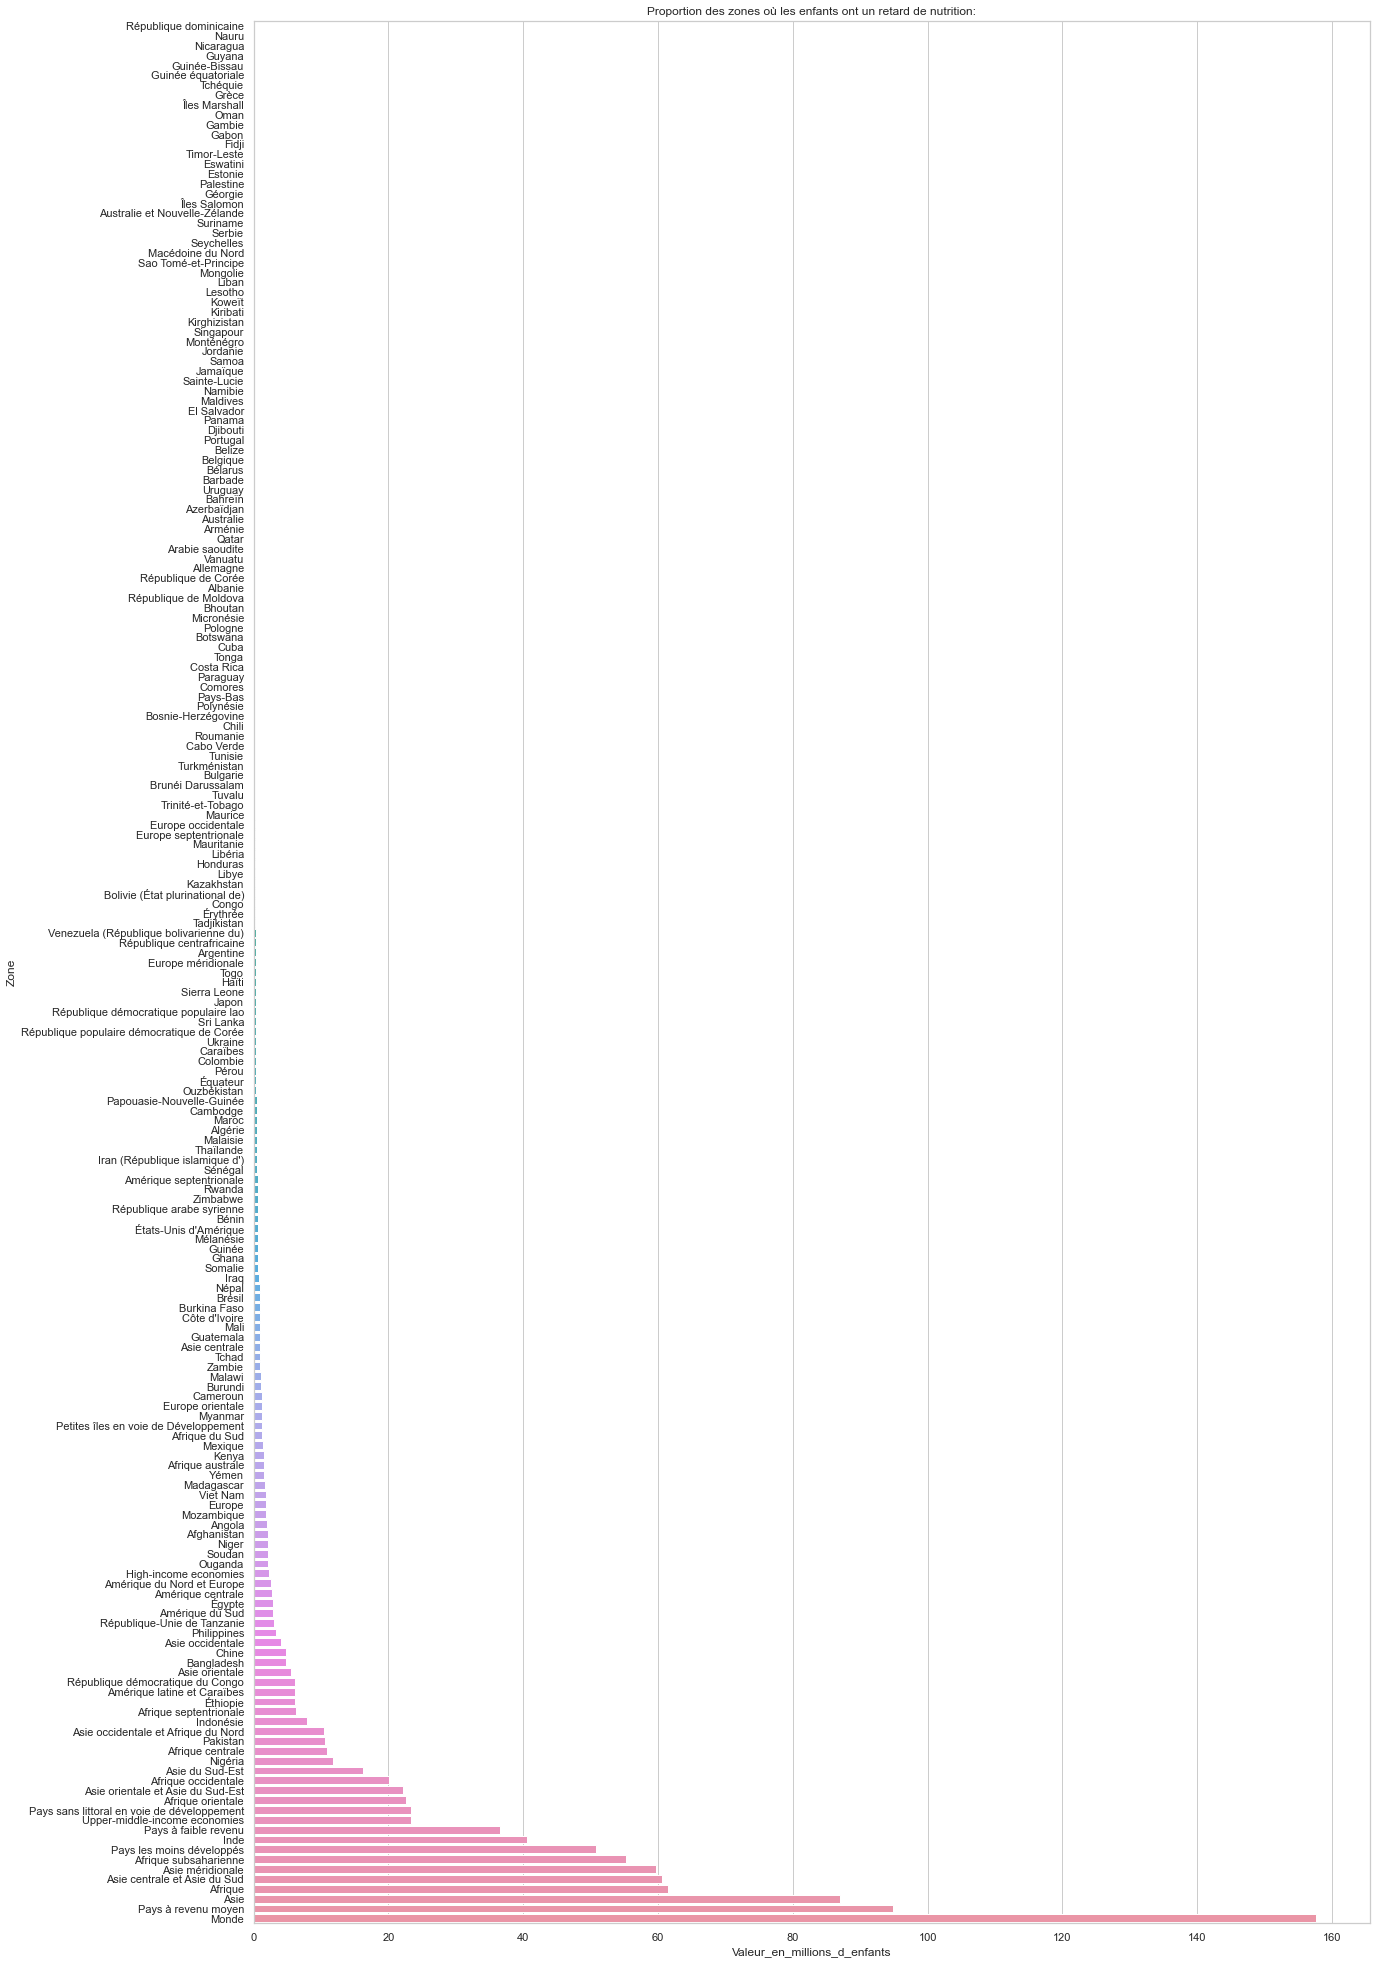

In [89]:
dftest_Enfants = dftest_Enfants.rename(columns = {'Valeur' : 'Valeur_en_millions_d_enfants'})

plt.figure(figsize=(20, 35))
sns.barplot(x="Valeur_en_millions_d_enfants",y="Zone", data=dftest_Enfants).set_title("Proportion des zones où les enfants ont un retard de nutrition:");

In [90]:
dftest_Enfants = dftest_Enfants.sort_values(by=['Valeur_en_millions_d_enfants'], ascending=False)
dftest_Enfants_CoeurCible = dftest_Enfants.loc[dftest_Enfants['Valeur_en_millions_d_enfants'] > 2, :]

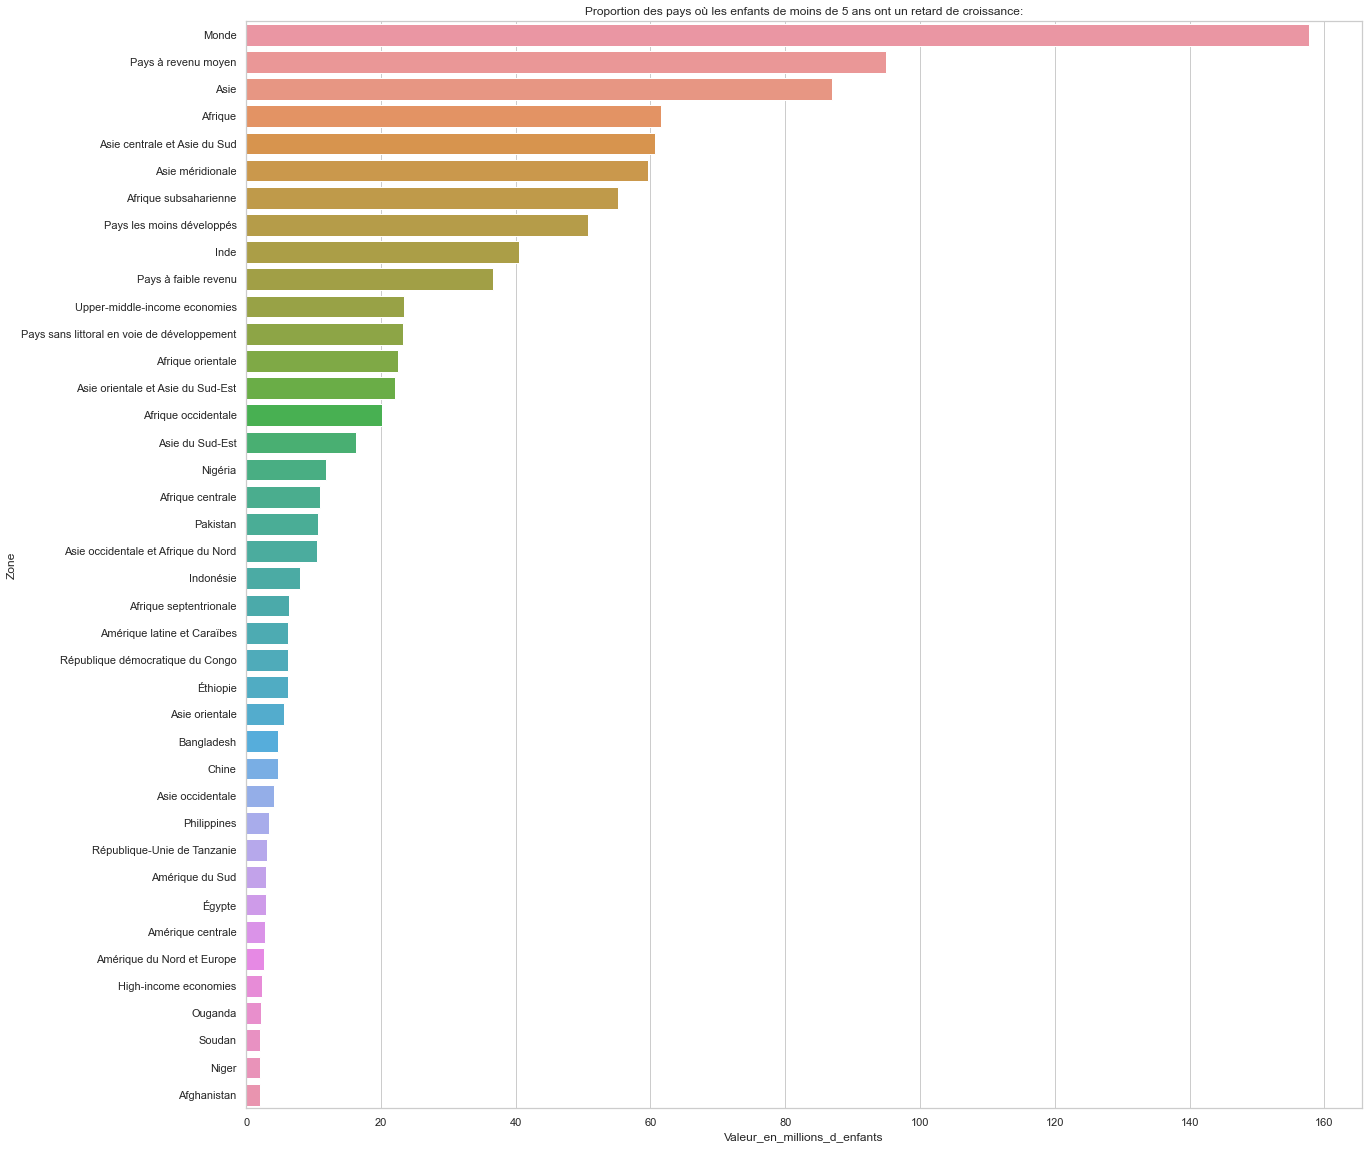

In [91]:
plt.figure(figsize=(20, 20))
sns.barplot(x='Valeur_en_millions_d_enfants',y="Zone", data=dftest_Enfants_CoeurCible).set_title("Proportion des pays où les enfants de moins de 5 ans ont un retard de croissance:");

# 2 / Nombre théorique de personnes qui pourraient être nourries :

In [92]:
# ***********************  FONCTIONNEMENT DES VARIABLES  ****************************

In [93]:
# VARIATION = Production + Importations - Semences - Pertes - Nourriture - Animaux - Autres - Exportations
# DISPO INTÉRIEURE = Production + Importations + Variation 
# ***********************************************************************************
# Récupération d'une autre variable correspondant exactement à notre problème : 
# "Suffisance des apports énergétiques alimentaires moyens (%) (moyenne sur 3 ans)"

# Calcul via 2 méthodes  :
# 1/ sur base de la disponibilité alimentaire (dispo_alimentaire)
# 2/ sur base de la suffisance énergétique (variable récupérée du data set complet normalisé pour la Zone : "Monde")

In [94]:
dispo_alimentaire.head(15)

,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
Afghanistan,"Beurre, Ghee",animale,NaN,NaN,23.0,1.17,2.61,0.03,36.0,NaN,0.0,36.0,NaN,36.0,NaN,NaN,NaN
Afghanistan,Bière,vegetale,NaN,NaN,0.0,0.09,NaN,0.00,3.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN
Afghanistan,Blé,vegetale,NaN,NaN,1369.0,160.23,4.69,36.91,5992.0,NaN,1173.0,4895.0,775.0,5169.0,322.0,NaN,-350.0
Afghanistan,Boissons Alcooliques,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
dispo_alimentaire = dispo_alimentaire.fillna(0)

In [127]:
# Contrôle de la formule de la variation :

variation = dispo_alimentaire['Production']  - dispo_alimentaire['Semences'] - dispo_alimentaire['Pertes'] - dispo_alimentaire['Nourriture'] - dispo_alimentaire['Aliments pour animaux'] - dispo_alimentaire['Autres Utilisations'] - dispo_alimentaire['Exportations - Quantité'] + dispo_alimentaire['Importations - Quantité']
variation.head(15) # Formule OK

Zone
Afghanistan      0.0
Afghanistan      0.0
Afghanistan      0.0
Afghanistan      0.0
Afghanistan      0.0
Afghanistan      0.0
Afghanistan      0.0
Afghanistan    350.0
Afghanistan      0.0
Afghanistan      0.0
Afghanistan      0.0
Afghanistan      0.0
Afghanistan      0.0
Afghanistan      0.0
Afghanistan      0.0
dtype: float64

In [129]:
# Contrôle de la formule de la dispo intérieure :
dispo_int = dispo_alimentaire['Production'] + dispo_alimentaire['Importations - Quantité'] + dispo_alimentaire['Variation de stock'] - dispo_alimentaire['Autres Utilisations']
dispo_int.head(10) # Formule OK

Zone
Afghanistan      53.0
Afghanistan      43.0
Afghanistan       2.0
Afghanistan       0.0
Afghanistan      82.0
Afghanistan      36.0
Afghanistan       3.0
Afghanistan    5992.0
Afghanistan       0.0
Afghanistan       0.0
dtype: float64

In [105]:
df_Monde_AnalyseGlobale
# Besoins énergétiques alimentaires minimaux (kcal/personne/jour)
# Besoins énergétiques alimentaires moyens (kcal/personne/jour)
# Disponibilités protéines moyennes d'origine an...

,Produit,Valeur
120714,Suffisance des apports énergétiques alimentair...,123.0
120733,Valeur moyenne de la production alimentaire ($...,103.0
120750,Disponibilité alimentaire par habitant utilisé...,2934.0
120769,"Part des céréales, des racines et des tubercul...",49.0
120786,Disponibilités protéiques moyennes (g/personne...,80.1
120803,Disponibilités protéines moyennes dorigine an...,31.6
120823,"PIB par habitant, ($ PPA internationaux consta...",16242.9
120843,Prévalence de la sous-alimentation (%) (moyenn...,8.2
120863,Prévalence de la sous-alimentation (%) (valeur...,8.1
120883,Nombre de personnes sous-alimentées (millions)...,622.7


In [ ]:
 "Disponibilité alimentaire par habitant utilisée dans l'estimation de la prévalence de la sous-alimentation 
    (kcal/personne/jour) (moyenne sur 3 ans)"


In [135]:
df_Monde_AnalyseGlobale.Produit.unique()

array(['Suffisance des apports énergétiques alimentaires moyens (%) (moyenne sur 3 ans)',
       'Valeur moyenne de la production alimentaire ($I constants par personne) (moyenne sur 3 ans)',
       "Disponibilité alimentaire par habitant utilisée dans l'estimation de la prévalence de la sous-alimentation (kcal/personne/jour) (moyenne sur 3 ans)",
       'Part des céréales, des racines et des tubercules dans les apports énergétiques alimentaires (%) (moyenne sur 3 ans)',
       'Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)',
       'Disponibilités protéines moyennes d\x92origine animale (g/personne/jour) (moyenne sur 3 ans)',
       'PIB par habitant, ($ PPA internationaux constants de 2011)',
       'Prévalence de la sous-alimentation (%) (moyenne sur 3 ans)',
       'Prévalence de la sous-alimentation (%) (valeur annuelle)',
       'Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)',
       'Nombre de personnes sous-alimentées (millions) (

In [ ]:
# Combien de personnes pourrions-nous nourir : Calcul via 2 méthodes  :
# 1/ sur base de la disponibilité alimentaire (dispo_alimentaire)
# 2/ sur base de la suffisance énergétique (variable récupérée du data set complet normalisé pour la Zone : "Monde")

In [ ]:
# Extraction de variables

In [136]:
dispo_alimentaire.index.unique() # 174 pays

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Viet Nam', 'Yémen', 'Zambie', 'Zimbabwe', 'Égypte',
       'Émirats arabes unis', 'Équateur', 'États-Unis d'Amérique', 'Éthiopie',
       'Îles Salomon'],
      dtype='object', name='Zone', length=174)

In [144]:
taux_moyen_dispo_alim_monde = (dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'].sum()) / dispo_alimentaire.index.unique().shape
taux_moyen_dispo_alim_monde

array([2847.36781609])

## Résultats : Sur le jeux de données dispo_alimentaire nous avons un taux moyen mondial de disponibilité alimentaire de 2847.37 Kcal/j/pers

In [147]:
df_Monde_AnalyseGlobale

,Produit,Valeur
120714,Suffisance des apports énergétiques alimentair...,123.0
120733,Valeur moyenne de la production alimentaire ($...,103.0
120750,Disponibilité alimentaire par habitant utilisé...,2934.0
120769,"Part des céréales, des racines et des tubercul...",49.0
120786,Disponibilités protéiques moyennes (g/personne...,80.1
120803,Disponibilités protéines moyennes dorigine an...,31.6
120823,"PIB par habitant, ($ PPA internationaux consta...",16242.9
120843,Prévalence de la sous-alimentation (%) (moyenn...,8.2
120863,Prévalence de la sous-alimentation (%) (valeur...,8.1
120883,Nombre de personnes sous-alimentées (millions)...,622.7


In [162]:
besoin_energ_mini = df_Monde_AnalyseGlobale.loc[df_Monde_AnalyseGlobale['Produit'] == "Besoins énergétiques alimentaires minimaux (kcal/personne/jour)",:]
besoin_energ_mini

,Produit,Valeur
121307,Besoins énergétiques alimentaires minimaux (kc...,1826.0


In [163]:
besoin_energ_moyen = df_Monde_AnalyseGlobale.loc[df_Monde_AnalyseGlobale['Produit'] == "Besoins énergétiques alimentaires moyens (kcal/personne/jour)",:]
besoin_energ_moyen

,Produit,Valeur
121328,Besoins énergétiques alimentaires moyens (kcal...,2357.0


In [169]:
taux_moyen_dispo_alim_monde/besoin_energ_mini['Valeur']

121307    1.559347
Name: Valeur, dtype: float64

In [181]:
pop_nourrissable = taux_moyen_dispo_alim_monde/besoin_energ_moyen['Valeur']
pop_nourrissable

121328    1.208047
Name: Valeur, dtype: float64

# En prenant en compte les besoins énergétiques alimentaires moyens globaux de 2017 nous pourrions nourir environ 120.8047% de la population

In [182]:
pop_totale_2017 = population['Valeurs_en_millions_habitants'].sum()

In [183]:
pop_totale_2017*pop_nourrissable

121328    9118.50409
Name: Valeur, dtype: float64

# En 2017 on aurait pu nourir 9 118 504 090  Personnes approximativement

In [ ]:
taux_moyen_dispo_alim_monde/df_Monde_AnalyseGlobale['Besoins énergétiques alimentaires moyens (kcal/personne/jour)']

In [ ]:
dispo_alimentaire

In [115]:
dispo_alimentaire.index.unique()

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Viet Nam', 'Yémen', 'Zambie', 'Zimbabwe', 'Égypte',
       'Émirats arabes unis', 'Équateur', 'États-Unis d'Amérique', 'Éthiopie',
       'Îles Salomon'],
      dtype='object', name='Zone', length=174)

In [93]:
# Proportion de la population mondiale souffrante de mal-nutrition :
df_Monde_AnalyseGlobale.loc[df_Monde_AnalyseGlobale['Produit'] == "Suffisance des apports énergétiques alimentaires moyens (%) (moyenne sur 3 ans)", :]

,Produit,Valeur
120714,Suffisance des apports énergétiques alimentair...,123.0


### Première analyse niveau mondial : 
### Détection de 23% de suffisance énergétique excédentaire produite gâchée ou perdue alors que 8,2% de la population mondiale est en sous-nutrition.

# 123% de taux de suffisance énergétique moyen niveau mondial  en 2017

In [ ]:
# calcul du nbre de personnes nourrisables avec les produits végétaux :

In [184]:
dispo_alimentaire

,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
dispo_alim_vegetaux = dispo_alimentaire.loc[dispo_alimentaire['Origine'] == 'vegetale']
dispo_alim_vegetaux

,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Îles Salomon,Sésame,vegetale,0.0,0.0,0.0,0.01,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Îles Salomon,Thé,vegetale,0.0,0.0,0.0,0.17,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Îles Salomon,Tomates,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [192]:
taux_de_couverture_possible_végétaux_dans_alimentation_humaine = dispo_alim_vegetaux['Disponibilité alimentaire (Kcal/personne/jour)'].sum() / dispo_alim_vegetaux.index.unique().shape
taux_de_couverture_possible_végétaux_dans_alimentation_humaine

array([2291.85057471])

In [194]:
popo_nourrissable_vegetaux = taux_de_couverture_possible_végétaux_dans_alimentation_humaine/df_Monde_AnalyseGlobale.loc[df_Monde_AnalyseGlobale['Produit'] == "Besoins énergétiques alimentaires moyens (kcal/personne/jour)",'Valeur']

# Nous pouvons nourir jusqu'à 97.24% de la population humaine avec l'alimentation végétale.

In [195]:
pop_totale_2017 = population['Valeurs_en_millions_habitants'].sum()

In [196]:
pop_totale_2017*popo_nourrissable_vegetaux

121328    7339.497455
Name: Valeur, dtype: float64

# Nous ne pourrions nourrir que 7 339 497 455 approximativement uniquement via des produits végétaux.

In [94]:
# Bref Aparté :

# Sur les 100% de pop totale 8,2% sont en sous-nutrition donc,
#    si le taux de suffisance énergétique moyen 2017 est de 123%

# Cela signifie : 
#    que 100-8.2 = 91.8% de la population mondiale n'est pas en sous-nutrition.
    
# Avec un taux de suffisance énergétique de 123% en 2017 nous avons un différentiel d'approximativement 31.2% entre
# la disponibilité énergétique et l'effectivité d'utilisation de la suffisance énergétique réalisée.
# 123% - 91.8% = 31.2% de suffisance énergétique perdue par le frottement des cycles d'acheminement ou d'exploitation.

In [95]:
# Population totale en milliards :

pop_totale_monde = population.Valeurs_en_millions_habitants.sum()/1000

In [96]:
pop_en_sous_nutrition = pop_totale_monde *0.082
pop_en_sous_nutrition

0.6189469971020002

In [97]:
# Soit 7 548 134 111 d'habitants
pop_totale_monde *.31

2.3399215744100004

# En 2017 l'espèce humaine pourrait nourrir 2.34 milliard d''individus supplémentaires avec la volumétrie des productions réalisées.
# Et concrètement 619 millions de personnes sont en sous-nutrition alors qu'on pourrait en nourir 1.72 milliards de plus que la population humaine totale actuelle.

In [98]:
dispo_alimentaire

,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN


# Part de la disponibilité intérieure attribuée à l'alimentation animale :

In [99]:
total_dispo_alimentaire_animaux = dispo_alimentaire["Aliments pour animaux"].sum()
total_dispo_alimentaire_animaux   # en milliers de tonnes

1304245.0

In [100]:
total_dispo_intérieure_humaine = dispo_alimentaire["Disponibilité intérieure"].sum() # en milliers de tonnes
total_dispo_intérieure_humaine

9848994.0

In [101]:
total_dispo_alimentaire_animaux / total_dispo_intérieure_humaine *100

13.242418464261426

# Part de la disponibilité intérieure utilisée pour les animaux = 13.24 %

In [102]:
#####################################################################################################################

# Part de la disponibilité intérieure utilisée pour l'alimentation humaine :

In [103]:
total_dispo_alimentaire_humain = dispo_alimentaire["Nourriture"].sum()
total_dispo_alimentaire_humain   # en milliers de tonnes

4876258.0

In [104]:
total_dispo_alimentaire_humain / total_dispo_intérieure_humaine *100

49.51021393657058

# Part de la dispo intérieure utilisée pour l'alimentation humaine = 49,51%

In [105]:
#####################################################################################################################

In [106]:
total_dispo_alimentaire_pertes = dispo_alimentaire["Pertes"].sum()
total_dispo_alimentaire_pertes   # en milliers de tonnes

453698.0

In [107]:
proportion_dispo_alimentaire_perdues = total_dispo_alimentaire_pertes / total_dispo_intérieure_humaine *100
proportion_dispo_alimentaire_perdues

4.606541541196999

# Proportion de la disponibilité intérieure perdues = 4,60%

In [108]:
#####################################################################################################################

In [109]:
total_dispo_intérieure_humaine * (proportion_dispo_alimentaire_perdues*0.01)

453698.0

# 453 698 000 Tonnes de disponibilité alimentaire catégorisées en PERTES.

In [110]:
#####################################################################################################################

In [111]:
dispo_alimentaire.tail(47)

,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Îles Salomon,Huile de Soja,vegetale,NaN,NaN,0.0,0.00,0.00,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
Îles Salomon,Huile de Sésame,vegetale,NaN,NaN,0.0,0.01,0.02,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
Îles Salomon,Huile de Tournesol,vegetale,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Îles Salomon,Huiles de Foie de Poisso,animale,NaN,0.0,0.0,0.00,0.00,0.00,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
Îles Salomon,Huiles de Poissons,animale,NaN,0.0,0.0,0.00,0.00,0.00,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
Îles Salomon,Ignames,vegetale,NaN,NaN,200.0,78.61,0.21,3.66,45.0,NaN,NaN,44.0,1.0,45.0,NaN,NaN,NaN
Îles Salomon,Lait - Excl Beurre,animale,0.0,NaN,19.0,11.52,0.70,1.05,7.0,NaN,5.0,6.0,0.0,1.0,NaN,NaN,NaN
Îles Salomon,"Légumes, Autres",vegetale,NaN,NaN,8.0,12.96,0.06,0.42,8.0,NaN,0.0,7.0,0.0,7.0,NaN,NaN,NaN
Îles Salomon,Légumineuses Autres,vegetale,NaN,NaN,99.0,10.65,0.59,6.42,7.0,NaN,0.0,6.0,0.0,7.0,0.0,NaN,NaN


# Comment est distribuée la production dans chaque domaine :

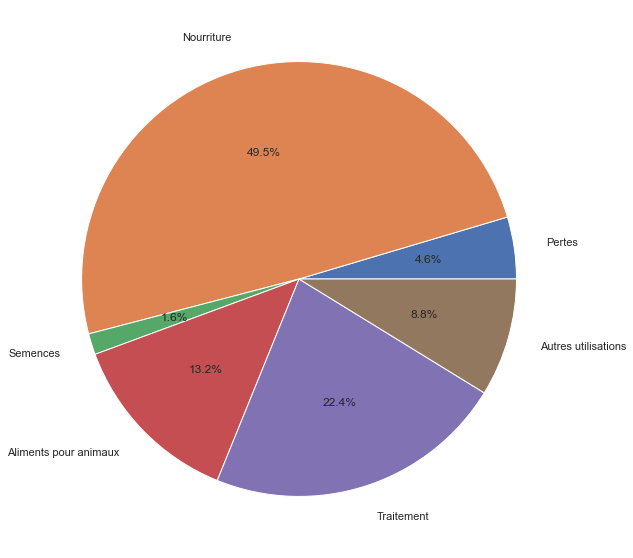

In [95]:
plt.figure(figsize=(10,10))

# create data: an array of values
names = "Pertes","Nourriture","Semences","Aliments pour animaux","Traitement","Autres utilisations"
size_of_groups=[
                dispo_alimentaire.Pertes.sum(),
                dispo_alimentaire.Nourriture.sum(),
                dispo_alimentaire.Semences.sum(),
                dispo_alimentaire["Aliments pour animaux"].sum(),
                dispo_alimentaire["Traitement"].sum(),
                dispo_alimentaire["Autres Utilisations"].sum()]

# Use it thanks to the color argument
plt.pie(size_of_groups,labels=names,labeldistance=1.15, autopct='%1.1f%%', wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' });

# Rapport entre les mesures à l'import et à l'export :

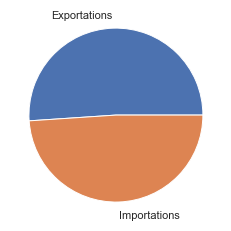

In [113]:
# create data: an array of values
names = "Exportations","Importations"
size_of_groups=[dispo_alimentaire["Exportations - Quantité"].sum(),
                dispo_alimentaire["Importations - Quantité"].sum()]

# Use it thanks to the color argument
plt.pie(size_of_groups,labels=names,labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' });

# Extraction des données pour tansfert sur Data Visualisation intéractives :

In [117]:
datatoexcel = df

datatoexcel = pd.ExcelWriter('Jeux_de_donnée_monde.xlsx') 
  
df.to_excel(datatoexcel) 
  
datatoexcel.save() 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [118]:
datatoexcel = aide_alimentaire

datatoexcel = pd.ExcelWriter('aide_alimentaire_nettoyé.xlsx') 
  
aide_alimentaire.to_excel(datatoexcel) 
  
datatoexcel.save() 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [119]:
datatoexcel = dispo_alimentaire

datatoexcel = pd.ExcelWriter('dispo_alimentaire_nettoyé.xlsx') 
  
dispo_alimentaire.to_excel(datatoexcel) 
  
datatoexcel.save() 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [122]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

## Exploration des données disponibles à l'analyse pour chaque pays dans ['Produit'] :

In [116]:
# Nbre de données potentiellement analysables suite à notre filtrage :

dftest.loc[dftest['Zone'] == "Afghanistan",'Produit'].unique().shape

(33,)

In [117]:
# Affichage des données analysables pour sélection des données :

dftest.loc[df['Zone'] == "Afghanistan",'Produit'].unique()

array(['Suffisance des apports énergétiques alimentaires moyens (%) (moyenne sur 3 ans)',
       'Valeur moyenne de la production alimentaire ($I constants par personne) (moyenne sur 3 ans)',
       "Disponibilité alimentaire par habitant utilisée dans l'estimation de la prévalence de la sous-alimentation (kcal/personne/jour) (moyenne sur 3 ans)",
       'Part des céréales, des racines et des tubercules dans les apports énergétiques alimentaires (%) (moyenne sur 3 ans)',
       'Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)',
       'Disponibilités protéines moyennes d\x92origine animale (g/personne/jour) (moyenne sur 3 ans)',
       'PIB par habitant, ($ PPA internationaux constants de 2011)',
       'Prévalence de la sous-alimentation (%) (moyenne sur 3 ans)',
       'Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)',
       'Prévalence de l\x92insécurité alimentaire grave \x96 population totale (%) (moyenne sur 3 ans)',
       'Prévalence

### Volumétrie de données disponibles avec des Valeurs renseignées :

<AxesSubplot:>

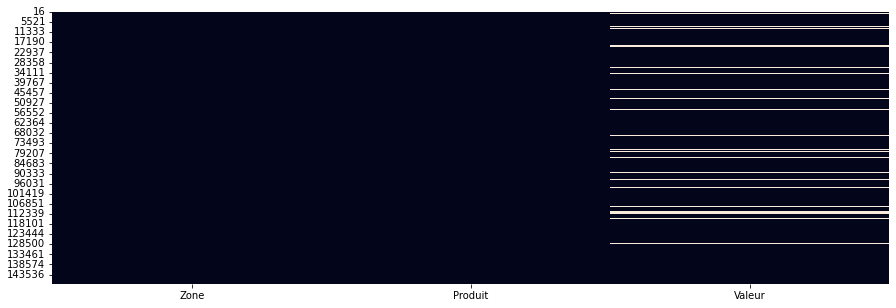

In [119]:
plt.figure(figsize=(15,5))
sns.heatmap(dftest.isna(), cbar=False)

## Sélection des données que l'on souhaite conserver :

In [120]:
# On conserve Zone / Produit / Valeurs en sortie :

dftest = dftest.loc[(dftest['Produit'] == "Nombre de personnes sous-alimentées (millions) (valeur annuelle)") |
                    (dftest['Produit'] == "Prévalence de la sous-alimentation (%) (valeur annuelle)") |
                    (dftest['Produit'] == "Prévalence de l\x92insécurité alimentaire grave \x96 population totale (%) (moyenne sur 3 ans)") |
                    (dftest['Produit'] == "Prévalence de l\x92insécurité alimentaire modérée ou grave \x96 population totale (%) (moyenne sur 3 ans)") |
                    (dftest['Produit'] == "Suffisance des apports énergétiques alimentaires moyens (%) (moyenne sur 3 ans)") |
                    (dftest['Produit'] == "Part des céréales, des racines et des tubercules dans les apports énergétiques alimentaires (%) (moyenne sur 3 ans)") |
                    (dftest['Produit'] == "Suffisance des apports énergétiques alimentaires moyens (%) (moyenne sur 3 ans)") |
                    (dftest['Produit'] == "Pourcentage des terres arables aménagées pour l'irrigation (%) (moyenne sur 3 ans)"),
                         ['Zone','Produit','Valeur']]

## Vérification de la présence des 'Valeur' pour nos choix en 'Produit' d'analyse :

In [121]:
### Volumétrie de données disponibles avec des Valeurs renseignées :

<AxesSubplot:>

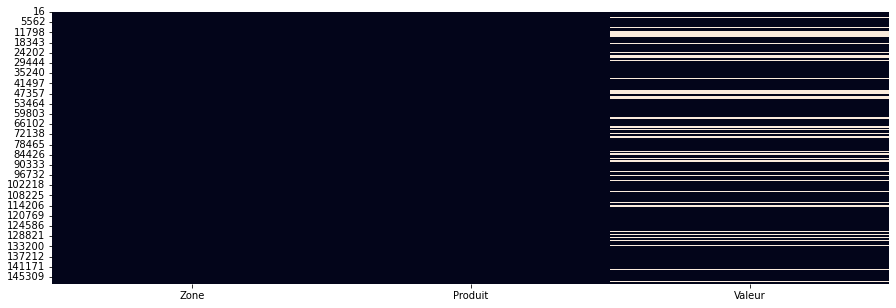

In [122]:
plt.figure(figsize=(15,5))
sns.heatmap(dftest.isna(), cbar=False)

In [123]:
# De nombreux Nan ...

# Regardons la taille de notre dataset :

In [124]:
dftest.shape

(1254, 3)

In [125]:
dftest = dftest.dropna()

In [126]:
dftest.shape
# Suite au nettoyage, perte de 226 lignes de données vides de data.

(1028, 3)

In [127]:
dftest.Produit.unique()

array(['Suffisance des apports énergétiques alimentaires moyens (%) (moyenne sur 3 ans)',
       'Part des céréales, des racines et des tubercules dans les apports énergétiques alimentaires (%) (moyenne sur 3 ans)',
       'Prévalence de l\x92insécurité alimentaire grave \x96 population totale (%) (moyenne sur 3 ans)',
       'Prévalence de l\x92insécurité alimentaire modérée ou grave \x96 population totale (%) (moyenne sur 3 ans)',
       "Pourcentage des terres arables aménagées pour l'irrigation (%) (moyenne sur 3 ans)",
       'Prévalence de la sous-alimentation (%) (valeur annuelle)',
       'Nombre de personnes sous-alimentées (millions) (valeur annuelle)'],
      dtype=object)

## Exploration des zones sur lesquels nous avons des données  :

In [128]:
dftest['Zone'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Andorre', 'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite',
       'Argentine', 'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan',
       'Bahamas', 'Bahreïn', 'Bangladesh', 'Barbade', 'Bélarus',
       'Belgique', 'Belize', 'Bénin', 'Bhoutan',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Brunéi Darussalam', 'Bulgarie',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodge', 'Cameroun',
       'Canada', 'Chili', 'Chine', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, continentale',
       'Chine, Taiwan Province de', 'Chypre', 'Colombie', 'Comores',
       'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatie', 'Cuba',
       'Danemark', 'Djibouti', 'Dominique', 'Égypte', 'El Salvador',
       'Émirats arabes unis', 'Équateur', 'Érythrée', 'Espagne',
       'Estonie', 'Eswatini', "États-Unis d'Amérique", 'Éthiopie',
       'Fédération d

## ---------- Nombre de Zones analysables -----------

In [129]:
# Nombre de zones différentes présentent sur l'année 2017 dans notre Data Set :

dftest['Zone'].unique().shape

(236,)

## Retrait des valeurs manquantes :

In [130]:
dftest = dftest.dropna()

In [131]:
# Vérification rapide des formes présentes dans notre colonne Valeur :
dftest

,Zone,Produit,Valeur
16,Afghanistan,Suffisance des apports énergétiques alimentair...,106
71,Afghanistan,"Part des céréales, des racines et des tubercul...",74
165,Afghanistan,Prévalence de linsécurité alimentaire grave ...,17.3
170,Afghanistan,Prévalence de linsécurité alimentaire modérée...,54.3
216,Afghanistan,Pourcentage des terres arables aménagées pour ...,41.6
...,...,...,...
147602,Upper-middle-income economies,Prévalence de la sous-alimentation (%) (valeur...,3.2
147641,Upper-middle-income economies,Nombre de personnes sous-alimentées (millions)...,90
147647,Upper-middle-income economies,Prévalence de linsécurité alimentaire grave ...,4.2
147659,Upper-middle-income economies,Prévalence de linsécurité alimentaire modérée...,16.7


## Mise en forme de nos données :

In [133]:
dftest['Suffisance_des_Apports_Energetiques_Alimentaires'] = dftest.loc[dftest['Produit'] == "Suffisance des apports énergétiques alimentaires moyens (%) (moyenne sur 3 ans)", 'Valeur']

dftest['%_de_Population_Insecurite_Alimentaire_Grave'] = dftest.loc[dftest['Produit'] == "Prévalence de l\x92insécurité alimentaire grave \x96 population totale (%) (moyenne sur 3 ans)", 'Valeur']

dftest['Nbre_Personnes_Sous_Alimentees_en_Millions'] = dftest.loc[dftest['Produit'] == "Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)", 'Valeur']

dftest['%_de_Population_Sous_Alimentation'] = dftest.loc[dftest['Produit'] == "Prévalence de la sous-alimentation (%) (moyenne sur 3 ans)", 'Valeur']

dftest['%_de_population_Insecurite_Alimentaire_Moderee_ou_Grave'] = dftest.loc[dftest['Produit'] == "Prévalence de l\x92insécurité alimentaire modérée ou grave \x96 population totale (%) (moyenne sur 3 ans)", 'Valeur']

dftest['%_ de_Cereales_Racines_et_Tubercules_dans_Apports_Alimentaires'] = dftest.loc[dftest['Produit'] == "Part des céréales, des racines et des tubercules dans les apports énergétiques alimentaires (%) (moyenne sur 3 ans)", 'Valeur']

In [134]:
dftest['Nbre_Personnes_Sous_Alimentees_en_Millions']

16       NaN
71       NaN
165      NaN
170      NaN
216      NaN
          ..
147602   NaN
147641   NaN
147647   NaN
147659   NaN
147726   NaN
Name: Nbre_Personnes_Sous_Alimentees_en_Millions, Length: 1028, dtype: float64

<AxesSubplot:>

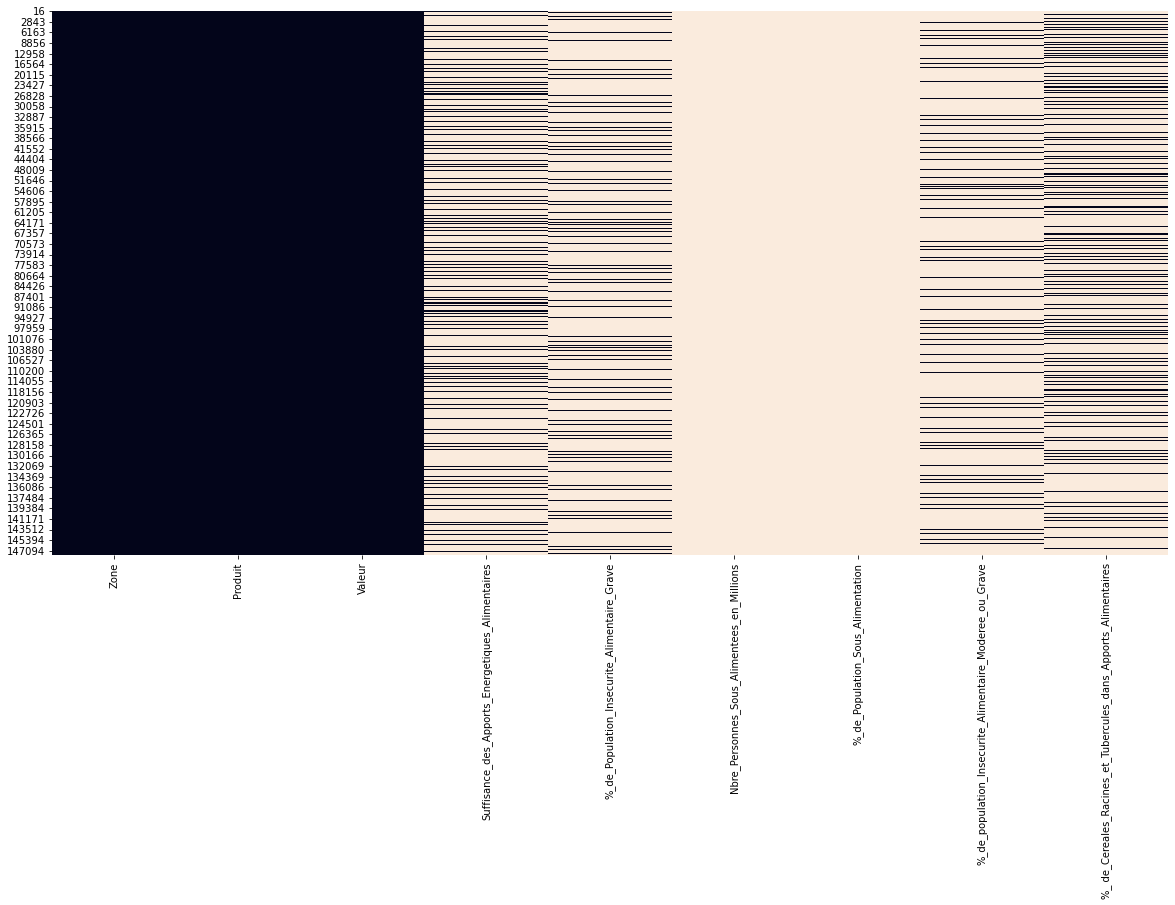

In [135]:
#dftest = dftest.drop(columns={'Produit','Valeur'})
plt.figure(figsize=(20,10))
sns.heatmap(dftest.isna(), cbar=False)

### Création de deux datasets  :
#### df_Proportion_Sous_Alim
#### df_Nbre_Personnes_Sous_Alim

In [136]:
# On sélectionne les données relatives à la Prévalence de la Sous-Alimentation en % dans chaque zone :
df_Proportion_Sous_Alim = dftest.loc[dftest['Produit'] == "Prévalence de la sous-alimentation (%) (valeur annuelle)", :]

# On sélectionne les données relatives au Nombre de Personnes en Sous-Alimentation dans chaque zone :
df_Nbre_Personnes_Sous_Alim = dftest.loc[dftest['Produit'] == "Nombre de personnes sous-alimentées (millions) (valeur annuelle)", :]

### On tri par décroissance pour le classement et le confort d'analyse à la visualisation :

In [137]:
df_Proportion_Sous_Alim = df_Proportion_Sous_Alim.sort_values(by=['Valeur'], ascending=True)
df_Nbre_Personnes_Sous_Alim = df_Nbre_Personnes_Sous_Alim.sort_values(by=['Valeur'], ascending=True)

In [38]:
# Analyse des variables intéressantes :

    # Nous retiendrons peu de variables pour ne pas surcharger notre analyse  :
        
        # 'Suffisance des apports Ã©nergÃ©tiques alimentaires moyens (%) (moyenne sur 3 ans)'
        # 'Besoins Ã©nergÃ©tiques alimentaires minimaux (kcal/personne/jour)'
        # 'Besoins Ã©nergÃ©tiques alimentaires moyens (kcal/personne/jour)'
    
    # Autres variables intéressantes à étudier :
            
            # "Pourcentage de la population utilisant au moins les services d'eau de base"
            # 'Incidence des pertes caloriques au niveau de la vente au dÃ©tail (%)'
            # 'Nombre de personnes en situation dâ\x80\x99insÃ©curitÃ© alimentaire modÃ©rÃ©e ou grave (millions) (moyenne sur 3 ans)'
            # "Taux de dÃ©pendance Ã\xa0 l'Ã©gard des importations cÃ©rÃ©aliÃ¨res (%) (moyenne sur 3 ans)"
            # 'Valeur des importations alimentaires par rapport aux exportations totales de marchandises (%) (moyenne sur 3 ans)'
            # "Pourcentage des terres arables amÃ©nagÃ©es pour l'irrigation (%) (moyenne sur 3 ans)"

## Nettoyage rapide du data frame :

In [123]:
dftest1.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]]

NameError: name 'dftest1' is not defined

In [41]:
dftest1 = dftest1.drop(dftest1.columns[[0,1,2,4,5,6,8,9,10,12,13,14]],axis=1)

In [42]:
# On conserve Zone / Produit / Valuer en sortie :

dftest1 = dftest1.loc[(dftest1['Produit'] == "Suffisance des apports Ã©nergÃ©tiques alimentaires moyens (%) (moyenne sur 3 ans)")|
                     (dftest1['Produit'] == "Besoins Ã©nergÃ©tiques alimentaires minimaux (kcal/personne/jour)")|
                     (dftest1['Produit'] == "Besoins Ã©nergÃ©tiques alimentaires moyens (kcal/personne/jour)"),:]

In [43]:
dftest1.Zone.unique().shape

(194,)

In [44]:
dftest1.head(10)

,Zone,Produit,Valeur
0,Afghanistan,Suffisance des apports Ã©nergÃ©tiques alimenta...,106
16,Afghanistan,Besoins Ã©nergÃ©tiques alimentaires minimaux (...,1676
17,Afghanistan,Besoins Ã©nergÃ©tiques alimentaires moyens (kc...,2134
21,Afrique du Sud,Suffisance des apports Ã©nergÃ©tiques alimenta...,121
36,Afrique du Sud,Besoins Ã©nergÃ©tiques alimentaires minimaux (...,1859
37,Afrique du Sud,Besoins Ã©nergÃ©tiques alimentaires moyens (kc...,2406
41,Albanie,Suffisance des apports Ã©nergÃ©tiques alimenta...,136
58,Albanie,Besoins Ã©nergÃ©tiques alimentaires minimaux (...,1911
59,Albanie,Besoins Ã©nergÃ©tiques alimentaires moyens (kc...,2490
63,AlgÃ©rie,Suffisance des apports Ã©nergÃ©tiques alimenta...,149


In [ ]:
dftest1
    

In [ ]:
m

In [ ]:
plt.figure(figsize=(2, 1,5))
sns.catplot(x = 'Valeur', y = "Zone", data=dftest1);

In [ ]:
plt.figure(figsize=(20, 25))
sns.catplot(x="Zone", y='Valeur', kind="boxen", hue = "Produit", data=dftest1, estimator= sum);

In [ ]:
plt.figure(figsize=(20, 25))
sns.catplot(x='Valeur', y="Zone", hue="Produit",
            kind="violin", data=dftest1)

In [ ]:
dftest2.head()

In [ ]:
dftest2 = tbtest2.drop(columns = {'Domaine', 'Produit', 'Ann?e','Code ?l?ment', 'Code ann?e','ï»¿Code Domaine', 'Code zone (FAO)', 'Code Produit', 'Symbole','Note', 'Description du Symbole'})

In [ ]:
dftest2

In [ ]:
dftest2['Valeur'][2]

In [ ]:
dftest2 = tbtest2.rename(columns={'?l?ment' : "Catégorie", 'Unit?' : " Unité"})
dftest2.Zone.unique().shape

In [ ]:
tbtest2['Catégorie'].

In [97]:
i = 0
n = -1
for label, row in dftest2.iterrows():
    i += 1
    n += 1
    if i == 1 :
        dftest2["Pourcentage de Population"][n] = 100
    if i == 2 :
        dftest2["Pourcentage de Population"][n] = dftest2['Valeur'][n]/(dftest2['Valeur'][n-1])*100
    if i == 3 :
        dftest2["Pourcentage de Population"][n] = dftest2['Valeur'][n]/dftest2['Valeur'][n-2]*100
    if i == 4 :
        dftest2["Pourcentage de Population"][n] = dftest2['Valeur'][n]/dftest2['Valeur'][n-3]*100       
    if i == 5 :
        dftest2["Pourcentage de Population"][n] = dftest2['Valeur'][n]/dftest2['Valeur'][n-4]*100
    if i == 6 :
        i = 0
        n -= 1 # lorsqu'on sort de la boucle sans itérer n a quand même été incrémenté donc on le désincrémente pour i=6.
                # Nous avons une règle de calcul basée sur un cycle de 5 réitérations de variables.

tbtest2.head(20)
        

    
    
    
    
#    print(tbtest2)

    #tbtest2['Pourcentage de population'] = tbtest2.loc[(tbtest2['Catégorie'] == "Population toal", "100%"]
    
    

NameError: name 'dftest2' is not defined